In [2]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# read the data
df = pd.read_csv('2020.csv',sep=';')

# shape and data types of the data
print(df.shape)
print(df.dtypes)

# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

(513, 20)
ID                                          int64
Kota_Kabupaten                             object
Provinsi                                   object
Area                                       object
Regional                                   object
Jumlah_Kelurahan_Desa                      object
PDRB                                        int64
PDRB_Per_Kapita                             int64
Indeks_Pembangunan_Manusia                float64
Jumlah_Penduduk                             int64
Luas_Wilayah                              float64
Dana_Alokasi_Umum                           int64
Pengeluaran_Riil_per_Kapita_ per_Tahun    float64
Nilai_UMR                                  object
Jumlah_Penduduk_Miskin                    float64
Jumlah_Penduduk_Bekerja                   float64
Pengguna_Internet                           int64
Pemilik_Ponsel                            float64
Pengguna_Ponsel                            object
Jumlah_Agen_Pulsa                       

In [3]:
#menjadi numeric agar bisa diolah
df['Nilai_UMR'] = pd.to_numeric(df['Nilai_UMR'], errors='coerce')
df['Pengguna_Ponsel'] = pd.to_numeric(df['Pengguna_Ponsel'], errors='coerce')
df['Jumlah_Agen_Pulsa'] = pd.to_numeric(df['Jumlah_Agen_Pulsa'], errors='coerce')

In [3]:
df.head()

,ID,Kota_Kabupaten,Provinsi,Area,Regional,Jumlah_Kelurahan_Desa,PDRB,PDRB_Per_Kapita,Indeks_Pembangunan_Manusia,Jumlah_Penduduk,Luas_Wilayah,Dana_Alokasi_Umum,Pengeluaran_Riil_per_Kapita_ per_Tahun,Nilai_UMR,Jumlah_Penduduk_Miskin,Jumlah_Penduduk_Bekerja,Pengguna_Internet,Pemilik_Ponsel,Pengguna_Ponsel,Jumlah_Agen_Pulsa
0,1,Kota Sungai Penuh,Jambi,Area 1,Sumbagsel,4/65,7488,82367,75.42,96357,391.50,414326985,10248.0,0.0,2.78,41806.0,46893,59407.0,72385.0,37.0
1,2,Kab. Lampung Tengah,Lampung,Area 1,Lampung,10/301,71953,56156,70.16,1461172,3802.68,1259528176,11219.0,2442413.0,152.28,662539.0,943592,759070.0,1115607.0,705.0
2,3,Kab. Mesuji,Lampung,Area 1,Lampung,0/105,10578,52835,63.63,227265,2184.00,410246380,7984.0,2588912.0,14.72,95531.0,132091,114985.0,175374.0,71.0
3,4,Kab. Kepahiang,Bengkulu,Area 1,Sumbagsel,12/105,4321,31498,68.17,149484,665.00,403631660,9273.0,0.0,20.27,0.0,54865,80981.0,96905.0,46.0
4,5,Kab. Kerinci,Jambi,Area 1,Sumbagsel,2/285,10123,42413,71.21,250006,3355.27,570389068,9995.0,0.0,17.48,118080.0,28639,160714.0,187258.0,82.0


In [4]:
df.columns

Index(['ID', 'Kota_Kabupaten', 'Provinsi', 'Area', 'Regional',
       'Jumlah_Kelurahan_Desa', 'PDRB', 'PDRB_Per_Kapita',
       'Indeks_Pembangunan_Manusia', 'Jumlah_Penduduk', 'Luas_Wilayah',
       'Dana_Alokasi_Umum', 'Pengeluaran_Riil_per_Kapita_ per_Tahun',
       'Nilai_UMR', 'Jumlah_Penduduk_Miskin', 'Jumlah_Penduduk_Bekerja',
       'Pengguna_Internet', 'Pemilik_Ponsel', 'Pengguna_Ponsel',
       'Jumlah_Agen_Pulsa'],
      dtype='object')

# TUGAS 1

Apakah ada Variabel yang memiliki Duplicate/Missing/Anomaly Values? Bagaimana treatment Anda dalam menangani setiap Duplicate/Missing/Anomaly Values tersebut? (Akan lebih baik jika Anda bisa memperlihatkan pendekatan regresi/ML untuk melengkapi missing values, pada variabel yang relevan)

**MISSING VALUES**

In [5]:
#menghitung missing values
for col in df.columns:
    pct_missing = df[col].isnull().sum()
    print('{} - {}'.format(col,pct_missing))

ID - 0
Kota_Kabupaten - 0
Provinsi - 8
Area - 0
Regional - 0
Jumlah_Kelurahan_Desa - 0
PDRB - 0
PDRB_Per_Kapita - 0
Indeks_Pembangunan_Manusia - 0
Jumlah_Penduduk - 0
Luas_Wilayah - 0
Dana_Alokasi_Umum - 0
Pengeluaran_Riil_per_Kapita_ per_Tahun - 0
Nilai_UMR - 26
Jumlah_Penduduk_Miskin - 0
Jumlah_Penduduk_Bekerja - 0
Pengguna_Internet - 0
Pemilik_Ponsel - 6
Pengguna_Ponsel - 17
Jumlah_Agen_Pulsa - 8


**MISSING VALUES PEMILIK PONSEL(MEDIAN PROVINSI)**

In [6]:
nan_in_col  = df[df['Pemilik_Ponsel'].isnull()]
print(nan_in_col)

      ID        Kota_Kabupaten        Provinsi    Area  Regional  \
297  298    Kab. Mamuju Tengah  Sulawesi Barat  Area 4  Sulawesi   
360  361  Kab. Polewali Mandar  Sulawesi Barat  Area 4  Sulawesi   
380  381           Kab. Majene  Sulawesi Barat  Area 4  Sulawesi   
407  408           Kab. Mamasa  Sulawesi Barat  Area 4  Sulawesi   
423  424           Kab. Mamuju  Sulawesi Barat  Area 4  Sulawesi   
452  453      Kab. Pasang Kayu  Sulawesi Barat  Area 4  Sulawesi   

    Jumlah_Kelurahan_Desa   PDRB  PDRB_Per_Kapita  Indeks_Pembangunan_Manusia  \
297                  -/54   3154            23531                       65.71   
360                23/144  13369            30208                       63.84   
380                 20/62   4973            28601                       66.91   
407                13/168   2974            18364                       66.02   
423                 13/88  11731            39993                       68.15   
452                  4/59  10216     

In [7]:
df_sul = pd.DataFrame(df[df['Regional'] == 'Sulawesi'])

In [8]:
median_pemilik_ponsel_sulawesi = df_sul['Pemilik_Ponsel'].median()

In [9]:
df_nan_pemilik_ponsel = pd.DataFrame(nan_in_col)

In [10]:
df.at[297,'Pemilik_Ponsel'] = median_pemilik_ponsel_sulawesi
df.at[360,'Pemilik_Ponsel'] = median_pemilik_ponsel_sulawesi
df.at[380,'Pemilik_Ponsel'] = median_pemilik_ponsel_sulawesi
df.at[407,'Pemilik_Ponsel'] = median_pemilik_ponsel_sulawesi
df.at[423,'Pemilik_Ponsel'] = median_pemilik_ponsel_sulawesi
df.at[452,'Pemilik_Ponsel'] = median_pemilik_ponsel_sulawesi

In [11]:
df[df['Pemilik_Ponsel'].isnull()]

,ID,Kota_Kabupaten,Provinsi,Area,Regional,Jumlah_Kelurahan_Desa,PDRB,PDRB_Per_Kapita,Indeks_Pembangunan_Manusia,Jumlah_Penduduk,Luas_Wilayah,Dana_Alokasi_Umum,Pengeluaran_Riil_per_Kapita_ per_Tahun,Nilai_UMR,Jumlah_Penduduk_Miskin,Jumlah_Penduduk_Bekerja,Pengguna_Internet,Pemilik_Ponsel,Pengguna_Ponsel,Jumlah_Agen_Pulsa


MISSING VALUES PENGGUNA PONSEL

In [12]:
nan_in_col2  = df[df['Pengguna_Ponsel'].isnull()]
print(nan_in_col2)

      ID         Kota_Kabupaten           Provinsi    Area  Regional  \
301  302              Kab. Muna  Sulawesi Tenggara  Area 4  Sulawesi   
312  313          Kab. Wakatobi  Sulawesi Tenggara  Area 4  Sulawesi   
323  324            Kab. Kolaka  Sulawesi Tenggara  Area 4  Sulawesi   
329  330      Kab. Buton Tengah  Sulawesi Tenggara  Area 4  Sulawesi   
332  333     Kab. Buton Selatan                NaN  Area 4  Sulawesi   
353  354      Kab. Kolaka Utara  Sulawesi Tenggara  Area 4  Sulawesi   
362  363    Kab. Konawe Selatan  Sulawesi Tenggara  Area 4  Sulawesi   
363  364  Kab. Konawe Kepulauan  Sulawesi Tenggara  Area 4  Sulawesi   
369  370            Kota Baubau  Sulawesi Tenggara  Area 4  Sulawesi   
371  372            Kab. Konawe  Sulawesi Tenggara  Area 4  Sulawesi   
375  376       Kab. Buton Utara  Sulawesi Tenggara  Area 4  Sulawesi   
392  393      Kab. Konawe Utara  Sulawesi Tenggara  Area 4  Sulawesi   
412  413           Kota Kendari  Sulawesi Tenggara  Area 4  Sula

In [13]:
median_pengguna_ponsel = df_sul['Pengguna_Ponsel'].median()

In [14]:
df.at[301,'Pengguna_Ponsel'] = median_pengguna_ponsel
df.at[312,'Pengguna_Ponsel'] = median_pengguna_ponsel
df.at[323,'Pengguna_Ponsel'] = median_pengguna_ponsel
df.at[329,'Pengguna_Ponsel'] = median_pengguna_ponsel
df.at[332,'Pengguna_Ponsel'] = median_pengguna_ponsel
df.at[353,'Pengguna_Ponsel'] = median_pengguna_ponsel
df.at[362,'Pengguna_Ponsel'] = median_pengguna_ponsel
df.at[363,'Pengguna_Ponsel'] = median_pengguna_ponsel
df.at[369,'Pengguna_Ponsel'] = median_pengguna_ponsel
df.at[371,'Pengguna_Ponsel'] = median_pengguna_ponsel
df.at[375,'Pengguna_Ponsel'] = median_pengguna_ponsel
df.at[392,'Pengguna_Ponsel'] = median_pengguna_ponsel
df.at[412,'Pengguna_Ponsel'] = median_pengguna_ponsel
df.at[416,'Pengguna_Ponsel'] = median_pengguna_ponsel
df.at[419,'Pengguna_Ponsel'] = median_pengguna_ponsel
df.at[432,'Pengguna_Ponsel'] = median_pengguna_ponsel
df.at[471,'Pengguna_Ponsel'] = median_pengguna_ponsel

In [15]:
df[df['Pengguna_Ponsel'].isnull()]

,ID,Kota_Kabupaten,Provinsi,Area,Regional,Jumlah_Kelurahan_Desa,PDRB,PDRB_Per_Kapita,Indeks_Pembangunan_Manusia,Jumlah_Penduduk,Luas_Wilayah,Dana_Alokasi_Umum,Pengeluaran_Riil_per_Kapita_ per_Tahun,Nilai_UMR,Jumlah_Penduduk_Miskin,Jumlah_Penduduk_Bekerja,Pengguna_Internet,Pemilik_Ponsel,Pengguna_Ponsel,Jumlah_Agen_Pulsa


**MISSING VALUES JUMLAH AGEN PULSA**

In [16]:
nan_in_col3  = df[df['Jumlah_Agen_Pulsa'].isnull()]
print(nan_in_col3)

      ID          Kota_Kabupaten           Provinsi    Area  Regional  \
329  330       Kab. Buton Tengah  Sulawesi Tenggara  Area 4  Sulawesi   
332  333      Kab. Buton Selatan                NaN  Area 4  Sulawesi   
344  345     Kab. Morowali Utara    Sulawesi Tengah  Area 4  Sulawesi   
363  364   Kab. Konawe Kepulauan  Sulawesi Tenggara  Area 4  Sulawesi   
383  384       Kab. Banggai Laut    Sulawesi Tengah  Area 4  Sulawesi   
444  445  Kab. Manokwari Selatan        Papua Barat  Area 4    Malpua   
451  452   Kab. Pegunungan Arfak        Papua Barat  Area 4    Malpua   
471  472         Kab. Muna Barat  Sulawesi Tenggara  Area 4  Sulawesi   

    Jumlah_Kelurahan_Desa   PDRB  PDRB_Per_Kapita  Indeks_Pembangunan_Manusia  \
329                    77   2370            25456                       64.37   
332                    70   2937            36356                       64.93   
344                 3/122  11767            91700                       68.36   
363               

In [17]:
median_agen_pulsa_sulawesi = df_sul['Jumlah_Agen_Pulsa'].median()

In [18]:
df_papua_barat = pd.DataFrame(df[df['Provinsi'] == 'Papua Barat'])

In [19]:
median_agen_pulsa_papua_barat = df_papua_barat['Jumlah_Agen_Pulsa'].median()

In [20]:
df.at[329,'Jumlah_Agen_Pulsa'] = median_agen_pulsa_sulawesi
df.at[332,'Jumlah_Agen_Pulsa'] = median_agen_pulsa_sulawesi
df.at[344,'Jumlah_Agen_Pulsa'] = median_agen_pulsa_sulawesi
df.at[363,'Jumlah_Agen_Pulsa'] = median_agen_pulsa_sulawesi
df.at[383,'Jumlah_Agen_Pulsa'] = median_agen_pulsa_sulawesi
df.at[444,'Jumlah_Agen_Pulsa'] = median_agen_pulsa_papua_barat
df.at[451,'Jumlah_Agen_Pulsa'] = median_agen_pulsa_papua_barat
df.at[471,'Jumlah_Agen_Pulsa'] = median_agen_pulsa_sulawesi


In [21]:
df[df['Jumlah_Agen_Pulsa'].isnull()]

,ID,Kota_Kabupaten,Provinsi,Area,Regional,Jumlah_Kelurahan_Desa,PDRB,PDRB_Per_Kapita,Indeks_Pembangunan_Manusia,Jumlah_Penduduk,Luas_Wilayah,Dana_Alokasi_Umum,Pengeluaran_Riil_per_Kapita_ per_Tahun,Nilai_UMR,Jumlah_Penduduk_Miskin,Jumlah_Penduduk_Bekerja,Pengguna_Internet,Pemilik_Ponsel,Pengguna_Ponsel,Jumlah_Agen_Pulsa


In [22]:
#check missing values
df[df.isnull().any(axis=1)]

,ID,Kota_Kabupaten,Provinsi,Area,Regional,Jumlah_Kelurahan_Desa,PDRB,PDRB_Per_Kapita,Indeks_Pembangunan_Manusia,Jumlah_Penduduk,Luas_Wilayah,Dana_Alokasi_Umum,Pengeluaran_Riil_per_Kapita_ per_Tahun,Nilai_UMR,Jumlah_Penduduk_Miskin,Jumlah_Penduduk_Bekerja,Pengguna_Internet,Pemilik_Ponsel,Pengguna_Ponsel,Jumlah_Agen_Pulsa
14,15,Kab. Nias Selatan,Sumatera Utara,Area 1,Sumbagut,3/457,6861,21449,61.89,360765,1825.20,628496268,6974.0,NaN,53.88,165452.0000,63645,123047.0,169852.0,54.0
20,21,Kab. Nias Barat,Sumatera Utara,Area 1,Sumbagut,-/105,1817,20955,61.51,89741,473.73,333762307,5830.0,NaN,22.33,27785.0000,15817,31381.0,46847.0,16.0
58,59,Kab. Pakpak Bharat,Sumatera Utara,Area 1,Sumbagut,-/52,1178,24077,67.59,52098,1218.30,324896653,8170.0,NaN,4.59,29879.0000,15355,23429.0,36435.0,32.0
98,99,Kota Pematang Siantar,NaN,Area 1,Sumbagut,53/-,13933,54572,78.75,268001,55.66,569499118,12372.0,2501519.00,21.23,137927.0000,131927,174297.0,223081.0,250.0
167,168,Kab. Pandeglang,NaN,Area 2,Jabo Outer,13/326,28324,23371,65.00,1271660,2746.89,1125384369,8572.0,2758909.00,120.44,481092.0000,69118,584482.0,768914.0,606.0
175,176,Kota Cirebon,NaN,Area 2,Jabar,22/-,23457,73461,74.89,333537,37.36,548788411,11397.0,2219487.67,30.61,138667.0000,200741,217464.0,272425.0,310.0
235,236,Kab. Bantul,NaN,Area 3,Jateng,-/75,26345,25869,80.01,984743,506.86,931996005,15517.0,1790500.00,138.66,579229.0000,625056,610016.0,735376.0,743.0
237,238,Kab. Blora,NaN,Area 3,Jateng,24/271,25977,30031,68.84,883306,1821.59,883338891,9795.0,1834000.00,103.73,468013.0000,395900,474448.0,196591.0,397.0
261,262,Kota Kediri,NaN,Area 3,Jatim,46/-,139253,484513,78.23,286543,63.40,582747476,11976.0,2060925.00,22.19,142122.0000,188988,222760.0,222760.0,230.0
311,312,Kab. Siau Tagulandang Biaro,Sulawesi Utara,Area 4,Sulawesi,93,2367,35642,67.64,71564,275.86,368894458,8080.0,NaN,5.95,33638.0000,24927,38466.0,56826.0,28.0


In [23]:
df['Provinsi'].unique()

array(['Jambi', 'Lampung', 'Bengkulu', 'Sumatera Utara', 'Kepulauan Riau',
       'Sumatera Barat', 'Aceh', 'Sumatera Selatan', 'Riau', nan,
       'Bangka Belitung', 'Jawa Barat', 'DKI Jakarta', 'Banten',
       'Jawa Timur', 'Jawa Tengah', 'Yogyakarta', 'Sulawesi Selatan',
       'Kalimantan Tengah', 'Papua', 'Gorontalo', 'Maluku Utara',
       'Sulawesi Barat', 'Kalimantan Utara', 'Sulawesi Tengah',
       'Sulawesi Tenggara', 'Sulawesi Utara', 'Kalimantan Barat',
       'Papua Barat', 'Maluku', 'Kalimantan Selatan', 'Kalimantan Timur',
       'Nusa Tenggara Timur', 'Bali', 'Nusa Tenggara Barat'], dtype=object)

In [24]:
#mengisi missing values
df.at[98,'Provinsi'] = 'Sumatera Utara'
df.at[167,'Provinsi'] = 'Jawa Barat'
df.at[175,'Provinsi'] = 'Jawa Barat'
df.at[235,'Provinsi'] = 'Jawa Tengah'
df.at[237,'Provinsi'] = 'Jawa Tengah'
df.at[261,'Provinsi'] = 'Jawa Timur'
df.at[332,'Provinsi'] = 'Sulawesi Tenggara'
df.at[338,'Provinsi'] = 'Papua Barat'

In [25]:
#mengisi missing values dengan median, penggunaan median karena distribusi data memiliki outlier
#med = df['Pemilik_Ponsel'].median()
#print(med)
#df['Pemilik_Ponsel'] = df['Pemilik_Ponsel'].fillna(med)

In [26]:
#med = df['Pengguna_Ponsel'].median()
#print(med)
#f['Pengguna_Ponsel'] = df['Pengguna_Ponsel'].fillna(med)

In [27]:
#med = df['Jumlah_Agen_Pulsa'].median()
#print(med)
#df['Jumlah_Agen_Pulsa'] = df['Jumlah_Agen_Pulsa'].fillna(med)

In [28]:
#sanity check
for col in df.columns:
    pct_missing = df[col].isnull().sum()
    print('{} - {}'.format(col,pct_missing))

ID - 0
Kota_Kabupaten - 0
Provinsi - 0
Area - 0
Regional - 0
Jumlah_Kelurahan_Desa - 0
PDRB - 0
PDRB_Per_Kapita - 0
Indeks_Pembangunan_Manusia - 0
Jumlah_Penduduk - 0
Luas_Wilayah - 0
Dana_Alokasi_Umum - 0
Pengeluaran_Riil_per_Kapita_ per_Tahun - 0
Nilai_UMR - 26
Jumlah_Penduduk_Miskin - 0
Jumlah_Penduduk_Bekerja - 0
Pengguna_Internet - 0
Pemilik_Ponsel - 0
Pengguna_Ponsel - 0
Jumlah_Agen_Pulsa - 0


In [29]:
df[df.isnull().any(axis=1)]

,ID,Kota_Kabupaten,Provinsi,Area,Regional,Jumlah_Kelurahan_Desa,PDRB,PDRB_Per_Kapita,Indeks_Pembangunan_Manusia,Jumlah_Penduduk,Luas_Wilayah,Dana_Alokasi_Umum,Pengeluaran_Riil_per_Kapita_ per_Tahun,Nilai_UMR,Jumlah_Penduduk_Miskin,Jumlah_Penduduk_Bekerja,Pengguna_Internet,Pemilik_Ponsel,Pengguna_Ponsel,Jumlah_Agen_Pulsa
14,15,Kab. Nias Selatan,Sumatera Utara,Area 1,Sumbagut,3/457,6861,21449,61.89,360765,1825.20,628496268,6974.0,NaN,53.88,165452.0,63645,123047.0,169852.0,54.0
20,21,Kab. Nias Barat,Sumatera Utara,Area 1,Sumbagut,-/105,1817,20955,61.51,89741,473.73,333762307,5830.0,NaN,22.33,27785.0,15817,31381.0,46847.0,16.0
58,59,Kab. Pakpak Bharat,Sumatera Utara,Area 1,Sumbagut,-/52,1178,24077,67.59,52098,1218.30,324896653,8170.0,NaN,4.59,29879.0,15355,23429.0,36435.0,32.0
311,312,Kab. Siau Tagulandang Biaro,Sulawesi Utara,Area 4,Sulawesi,93,2367,35642,67.64,71564,275.86,368894458,8080.0,NaN,5.95,33638.0,24927,38466.0,56826.0,28.0
325,326,Kab. Banggai Kepulauan,Sulawesi Tengah,Area 4,Sulawesi,3/141,4037,34096,65.42,119889,2488.79,446343684,7545.0,NaN,16.70,63278.0,33587,52586.0,69133.0,39.0
326,327,Kota Manado,Sulawesi Utara,Area 4,Sulawesi,87/-,37387,86217,78.93,452150,157.27,718105042,13886.0,NaN,25.55,171155.0,284622,335246.0,356579.0,734.0
327,328,Kab. Minahasa Utara,Sulawesi Utara,Area 4,Sulawesi,6/126,13819,67864,73.90,224740,918.49,478884543,11405.0,NaN,14.33,88401.0,110279,143931.0,167802.0,237.0
331,332,Kab. Bolaang Mongondow Timur,Sulawesi Utara,Area 4,Sulawesi,-/81,2879,39761,65.99,87988,910.18,329834100,8998.0,NaN,4.30,34770.0,35248,48490.0,57591.0,39.0
333,334,Kab. Bolaang Mongondow,Sulawesi Utara,Area 4,Sulawesi,2/200,8010,32325,67.89,248498,2871.65,520863307,10128.0,NaN,18.07,111901.0,84566,124991.0,160575.0,111.0
335,336,Kota Kotamobagu,Sulawesi Utara,Area 4,Sulawesi,18/15,3695,28777,72.97,123469,68.06,361109537,10744.0,NaN,7.06,61109.0,65503,78963.0,93459.0,128.0


In [30]:
#missing values di sumatera utara
df.loc[(df.Provinsi == 'Sumatera Utara') & (df['Nilai_UMR'].isnull())]

,ID,Kota_Kabupaten,Provinsi,Area,Regional,Jumlah_Kelurahan_Desa,PDRB,PDRB_Per_Kapita,Indeks_Pembangunan_Manusia,Jumlah_Penduduk,Luas_Wilayah,Dana_Alokasi_Umum,Pengeluaran_Riil_per_Kapita_ per_Tahun,Nilai_UMR,Jumlah_Penduduk_Miskin,Jumlah_Penduduk_Bekerja,Pengguna_Internet,Pemilik_Ponsel,Pengguna_Ponsel,Jumlah_Agen_Pulsa
14,15,Kab. Nias Selatan,Sumatera Utara,Area 1,Sumbagut,3/457,6861,21449,61.89,360765,1825.20,628496268,6974.0,NaN,53.88,165452.0,63645,123047.0,169852.0,54.0
20,21,Kab. Nias Barat,Sumatera Utara,Area 1,Sumbagut,-/105,1817,20955,61.51,89741,473.73,333762307,5830.0,NaN,22.33,27785.0,15817,31381.0,46847.0,16.0
58,59,Kab. Pakpak Bharat,Sumatera Utara,Area 1,Sumbagut,-/52,1178,24077,67.59,52098,1218.30,324896653,8170.0,NaN,4.59,29879.0,15355,23429.0,36435.0,32.0


In [31]:
UMR_SUMUT = 3222526
df.at[14,'Nilai_UMR'] = UMR_SUMUT
df.at[20,'Nilai_UMR'] = UMR_SUMUT
df.at[58,'Nilai_UMR'] = UMR_SUMUT

In [32]:
#missing values diprovinsi sulawesi utara
df.loc[(df.Provinsi == 'Sulawesi Utara') & (df['Nilai_UMR'].isnull())]

,ID,Kota_Kabupaten,Provinsi,Area,Regional,Jumlah_Kelurahan_Desa,PDRB,PDRB_Per_Kapita,Indeks_Pembangunan_Manusia,Jumlah_Penduduk,Luas_Wilayah,Dana_Alokasi_Umum,Pengeluaran_Riil_per_Kapita_ per_Tahun,Nilai_UMR,Jumlah_Penduduk_Miskin,Jumlah_Penduduk_Bekerja,Pengguna_Internet,Pemilik_Ponsel,Pengguna_Ponsel,Jumlah_Agen_Pulsa
311,312,Kab. Siau Tagulandang Biaro,Sulawesi Utara,Area 4,Sulawesi,93,2367,35642,67.64,71564,275.86,368894458,8080.0,NaN,5.95,33638.0,24927,38466.0,56826.0,28.0
326,327,Kota Manado,Sulawesi Utara,Area 4,Sulawesi,87/-,37387,86217,78.93,452150,157.27,718105042,13886.0,NaN,25.55,171155.0,284622,335246.0,356579.0,734.0
327,328,Kab. Minahasa Utara,Sulawesi Utara,Area 4,Sulawesi,6/126,13819,67864,73.90,224740,918.49,478884543,11405.0,NaN,14.33,88401.0,110279,143931.0,167802.0,237.0
331,332,Kab. Bolaang Mongondow Timur,Sulawesi Utara,Area 4,Sulawesi,-/81,2879,39761,65.99,87988,910.18,329834100,8998.0,NaN,4.30,34770.0,35248,48490.0,57591.0,39.0
333,334,Kab. Bolaang Mongondow,Sulawesi Utara,Area 4,Sulawesi,2/200,8010,32325,67.89,248498,2871.65,520863307,10128.0,NaN,18.07,111901.0,84566,124991.0,160575.0,111.0
335,336,Kota Kotamobagu,Sulawesi Utara,Area 4,Sulawesi,18/15,3695,28777,72.97,123469,68.06,361109537,10744.0,NaN,7.06,61109.0,65503,78963.0,93459.0,128.0
337,338,Kab. Bolaang Mongondow Selatan,Sulawesi Utara,Area 4,Sulawesi,-/81,2084,31540,65.00,69538,1615.86,333549036,8837.0,NaN,8.53,28510.0,21005,31317.0,43023.0,35.0
340,341,Kab. Kepulauan Sangihe,Sulawesi Utara,Area 4,Sulawesi,22/145,4248,32388,70.73,139009,461.11,504778603,11427.0,NaN,14.64,64335.0,47996,78483.0,101319.0,40.0
342,343,Kab. Minahasa Tenggara,Sulawesi Utara,Area 4,Sulawesi,9/135,5112,47821,70.51,116070,710.83,388590506,10408.0,NaN,13.73,49627.0,49843,59928.0,78888.0,64.0
351,352,Kab. Minahasa Selatan,Sulawesi Utara,Area 4,Sulawesi,10/167,8601,40824,72.11,236210,1409.97,512617579,11481.0,NaN,19.38,103336.0,104453,138919.0,177422.0,149.0


In [33]:
UMR_SULUT = 3310000
df.at[311,'Nilai_UMR'] = UMR_SULUT
df.at[326,'Nilai_UMR'] = UMR_SULUT
df.at[327,'Nilai_UMR'] = UMR_SULUT
df.at[331,'Nilai_UMR'] = UMR_SULUT
df.at[333,'Nilai_UMR'] = UMR_SULUT
df.at[335,'Nilai_UMR'] = UMR_SULUT
df.at[337,'Nilai_UMR'] = UMR_SULUT
df.at[340,'Nilai_UMR'] = UMR_SULUT
df.at[342,'Nilai_UMR'] = UMR_SULUT
df.at[351,'Nilai_UMR'] = UMR_SULUT
df.at[352,'Nilai_UMR'] = UMR_SULUT
df.at[355,'Nilai_UMR'] = UMR_SULUT
df.at[376,'Nilai_UMR'] = UMR_SULUT
df.at[399,'Nilai_UMR'] = UMR_SULUT
df.at[404,'Nilai_UMR'] = UMR_SULUT

In [34]:
#missing values Sulawesi Tengah
df.loc[(df.Provinsi == 'Sulawesi Tengah') & (df['Nilai_UMR'].isnull())]

,ID,Kota_Kabupaten,Provinsi,Area,Regional,Jumlah_Kelurahan_Desa,PDRB,PDRB_Per_Kapita,Indeks_Pembangunan_Manusia,Jumlah_Penduduk,Luas_Wilayah,Dana_Alokasi_Umum,Pengeluaran_Riil_per_Kapita_ per_Tahun,Nilai_UMR,Jumlah_Penduduk_Miskin,Jumlah_Penduduk_Bekerja,Pengguna_Internet,Pemilik_Ponsel,Pengguna_Ponsel,Jumlah_Agen_Pulsa
325,326,Kab. Banggai Kepulauan,Sulawesi Tengah,Area 4,Sulawesi,3/141,4037,34096,65.42,119889,2488.79,446343684,7545.0,NaN,16.70,63278.0,33587,52586.0,69133.0,39.0
365,366,Kota Palu,Sulawesi Tengah,Area 4,Sulawesi,46/-,24816,63405,81.47,373452,395.06,650829309,15074.0,NaN,26.89,202467.0,252690,265113.0,316987.0,420.0
378,379,Kab. Toli-Toli,Sulawesi Tengah,Area 4,Sulawesi,6/103,8545,36239,65.69,224901,4079.77,588276474,8017.0,NaN,30.51,113898.0,85136,114334.0,154687.0,74.0
383,384,Kab. Banggai Laut,Sulawesi Tengah,Area 4,Sulawesi,3/63,2437,32493,65.43,70182,725.67,390476710,7810.0,NaN,11.09,36528.0,18946,31913.0,36216.0,118.0
413,414,Kab. Poso,Sulawesi Tengah,Area 4,Sulawesi,28/141,9506,37075,71.28,244622,7112.25,685769750,8936.0,NaN,40.20,147614.0,98784,142206.0,190665.0,159.0
426,427,Kab. Tojo Una-Una,Sulawesi Tengah,Area 4,Sulawesi,12/134,5713,37099,64.59,163576,5721.15,552080735,7608.0,NaN,25.43,83898.0,45935,73269.0,97295.0,49.0
428,429,Kab. Sigi,Sulawesi Tengah,Area 4,Sulawesi,-/176,8987,37537,68.12,257332,5196.02,589752115,8236.0,NaN,30.00,123819.0,82130,119021.0,161306.0,165.0
434,435,Kab. Donggala,Sulawesi Tengah,Area 4,Sulawesi,9/158,12261,40317,65.56,300670,4275.08,627024200,8106.0,NaN,53.17,138929.0,94344,139603.0,191854.0,109.0


In [35]:
UMR_SULTENG = 2390739
df.at[325,'Nilai_UMR'] = UMR_SULTENG
df.at[365,'Nilai_UMR'] = UMR_SULTENG
df.at[378,'Nilai_UMR'] = UMR_SULTENG
df.at[383,'Nilai_UMR'] = UMR_SULTENG
df.at[413,'Nilai_UMR'] = UMR_SULTENG
df.at[426,'Nilai_UMR'] = UMR_SULTENG
df.at[428,'Nilai_UMR'] = UMR_SULTENG
df.at[434,'Nilai_UMR'] = UMR_SULTENG

In [36]:
#sanity Check
df[df.isnull().any(axis=1)]

,ID,Kota_Kabupaten,Provinsi,Area,Regional,Jumlah_Kelurahan_Desa,PDRB,PDRB_Per_Kapita,Indeks_Pembangunan_Manusia,Jumlah_Penduduk,Luas_Wilayah,Dana_Alokasi_Umum,Pengeluaran_Riil_per_Kapita_ per_Tahun,Nilai_UMR,Jumlah_Penduduk_Miskin,Jumlah_Penduduk_Bekerja,Pengguna_Internet,Pemilik_Ponsel,Pengguna_Ponsel,Jumlah_Agen_Pulsa


FILL ZERO

In [37]:
for col in df.columns:
    pct_zero = (df[col] == 0).sum()
    print('{} - {}'.format(col,pct_zero))

ID - 0
Kota_Kabupaten - 0
Provinsi - 0
Area - 0
Regional - 0
Jumlah_Kelurahan_Desa - 0
PDRB - 0
PDRB_Per_Kapita - 0
Indeks_Pembangunan_Manusia - 0
Jumlah_Penduduk - 0
Luas_Wilayah - 0
Dana_Alokasi_Umum - 6
Pengeluaran_Riil_per_Kapita_ per_Tahun - 0
Nilai_UMR - 41
Jumlah_Penduduk_Miskin - 0
Jumlah_Penduduk_Bekerja - 10
Pengguna_Internet - 0
Pemilik_Ponsel - 0
Pengguna_Ponsel - 0
Jumlah_Agen_Pulsa - 0


In [38]:
df.loc[(df.Nilai_UMR == 0)]


,ID,Kota_Kabupaten,Provinsi,Area,Regional,Jumlah_Kelurahan_Desa,PDRB,PDRB_Per_Kapita,Indeks_Pembangunan_Manusia,Jumlah_Penduduk,Luas_Wilayah,Dana_Alokasi_Umum,Pengeluaran_Riil_per_Kapita_ per_Tahun,Nilai_UMR,Jumlah_Penduduk_Miskin,Jumlah_Penduduk_Bekerja,Pengguna_Internet,Pemilik_Ponsel,Pengguna_Ponsel,Jumlah_Agen_Pulsa
0,1,Kota Sungai Penuh,Jambi,Area 1,Sumbagsel,4/65,7488,82367,75.42,96357,391.50,414326985,10248.0,0.0,2.78,41806.0000,46893,59407.0,72385.0,37.0
3,4,Kab. Kepahiang,Bengkulu,Area 1,Sumbagsel,12/105,4321,31498,68.17,149484,665.00,403631660,9273.0,0.0,20.27,0.0000,54865,80981.0,96905.0,46.0
4,5,Kab. Kerinci,Jambi,Area 1,Sumbagsel,2/285,10123,42413,71.21,250006,3355.27,570389068,9995.0,0.0,17.48,118080.0000,28639,160714.0,187258.0,82.0
7,8,Kab. Rejang Lebong,Bengkulu,Area 1,Sumbagsel,34/122,9370,35914,70.44,276392,1639.98,566437095,10234.0,0.0,41.47,0.0000,105399,146340.0,192097.0,113.0
17,18,Kab. Seluma,Bengkulu,Area 1,Sumbagsel,20/182,4603,23752,66.89,207624,2400.44,477383614,8220.0,0.0,36.23,0.0000,66410,100758.0,135296.0,73.0
21,22,Kota Jambi,Jambi,Area 1,Sumbagsel,62/-,30856,51024,78.37,605173,103.54,690724772,12056.0,0.0,50.44,286387.0000,130319,480575.0,480575.0,634.0
24,25,Kab. Kaur,Bengkulu,Area 1,Sumbagsel,3/192,3524,29075,66.99,126298,2369.05,415365742,8593.0,0.0,22.57,0.0000,37221,61035.0,74000.0,52.0
28,29,Kab. Tanjung Jabung Barat,Jambi,Area 1,Sumbagsel,20/114,43303,129676,67.54,317732,4649.85,490342499,9480.0,0.0,34.79,166179.0000,21910,173773.0,220457.0,161.0
29,30,Kab. Merangin,Jambi,Area 1,Sumbagsel,10/205,15377,39538,69.19,354286,7679.00,669437069,10279.0,0.0,33.92,187523.0000,27518,185929.0,218049.0,175.0
33,34,Kab. Bengkulu Selatan,Bengkulu,Area 1,Sumbagsel,16/142,5701,35992,70.63,165996,1186.10,525650342,9837.0,0.0,28.41,0.0000,57714,92389.0,130128.0,74.0


In [39]:
UMR_Jambi = 2930000
UMR_Bengkulu = 2215000
UMR_Babel = 3230000
UMR_Jabar = 3700000
UMR_Jateng = 2810000
UMR_Sulsel = 3255000
UMR_Sulbar = 2678000
UMR_Maluku = 2604000
UMR_Kalbar = 2434000
UMR_Kalsel = 2877000
UMR_Papuabarat = 3516000
UMR_Kaltim = 3014000
UMR_NTT = 1975000 
UMR_Jatim = 4375000

In [40]:
df.at[0,'Nilai_UMR'] = UMR_Jambi
df.at[3,'Nilai_UMR'] = UMR_Bengkulu
df.at[4,'Nilai_UMR'] = UMR_Jambi
df.at[7,'Nilai_UMR'] = UMR_Bengkulu
df.at[17,'Nilai_UMR'] = UMR_Bengkulu
df.at[21,'Nilai_UMR'] = UMR_Jambi
df.at[24,'Nilai_UMR'] = UMR_Bengkulu
df.at[28,'Nilai_UMR'] = UMR_Jambi
df.at[29,'Nilai_UMR'] = UMR_Jambi
df.at[33,'Nilai_UMR'] = UMR_Bengkulu
df.at[42,'Nilai_UMR'] = UMR_Jambi
df.at[46,'Nilai_UMR'] = UMR_Bengkulu
df.at[49,'Nilai_UMR'] = UMR_Bengkulu
df.at[54,'Nilai_UMR'] = UMR_Bengkulu
df.at[56,'Nilai_UMR'] = UMR_Bengkulu
df.at[59,'Nilai_UMR'] = UMR_Jambi
df.at[62,'Nilai_UMR'] = UMR_Bengkulu
df.at[82,'Nilai_UMR'] = UMR_Jambi
df.at[94,'Nilai_UMR'] = UMR_Jambi
df.at[99,'Nilai_UMR'] = UMR_Jambi
df.at[104,'Nilai_UMR'] = UMR_Jambi
df.at[107,'Nilai_UMR'] = UMR_Babel
df.at[109,'Nilai_UMR'] = UMR_Babel
df.at[136,'Nilai_UMR'] = UMR_Babel
df.at[137,'Nilai_UMR'] = UMR_Babel
df.at[139,'Nilai_UMR'] = UMR_Babel
df.at[142,'Nilai_UMR'] = UMR_Babel
df.at[144,'Nilai_UMR'] = UMR_Babel
df.at[171,'Nilai_UMR'] = UMR_Jabar
df.at[207,'Nilai_UMR'] = UMR_Jatim
df.at[212,'Nilai_UMR'] = UMR_Jateng
df.at[236,'Nilai_UMR'] = UMR_Jateng
df.at[266,'Nilai_UMR'] = UMR_Jateng
df.at[364,'Nilai_UMR'] = UMR_Sulsel
df.at[380,'Nilai_UMR'] = UMR_Sulbar
df.at[391,'Nilai_UMR'] = UMR_Maluku
df.at[393,'Nilai_UMR'] = UMR_Kalbar
df.at[405,'Nilai_UMR'] = UMR_Kalsel
df.at[411,'Nilai_UMR'] = UMR_Papuabarat
df.at[456,'Nilai_UMR'] = UMR_Kaltim
df.at[498,'Nilai_UMR'] = UMR_NTT

In [41]:
df.loc[(df.Nilai_UMR == 0)]

,ID,Kota_Kabupaten,Provinsi,Area,Regional,Jumlah_Kelurahan_Desa,PDRB,PDRB_Per_Kapita,Indeks_Pembangunan_Manusia,Jumlah_Penduduk,Luas_Wilayah,Dana_Alokasi_Umum,Pengeluaran_Riil_per_Kapita_ per_Tahun,Nilai_UMR,Jumlah_Penduduk_Miskin,Jumlah_Penduduk_Bekerja,Pengguna_Internet,Pemilik_Ponsel,Pengguna_Ponsel,Jumlah_Agen_Pulsa


**ZERO DANA ALOKASI UMUM**

In [42]:
df.loc[(df.Dana_Alokasi_Umum == 0)]

,ID,Kota_Kabupaten,Provinsi,Area,Regional,Jumlah_Kelurahan_Desa,PDRB,PDRB_Per_Kapita,Indeks_Pembangunan_Manusia,Jumlah_Penduduk,Luas_Wilayah,Dana_Alokasi_Umum,Pengeluaran_Riil_per_Kapita_ per_Tahun,Nilai_UMR,Jumlah_Penduduk_Miskin,Jumlah_Penduduk_Bekerja,Pengguna_Internet,Pemilik_Ponsel,Pengguna_Ponsel,Jumlah_Agen_Pulsa
156,157,Kota Jakarta Pusat,DKI Jakarta,Area 2,Jabo Inner,44/-,705614,760271,81.39,1055869,48.13,0,2009108.88,4267349.0,41.92,409589.0,744900,767428.0,856753.0,2504.0
160,161,Kota Jakarta Selatan,DKI Jakarta,Area 2,Jabo Inner,65/-,648231,286233,84.72,2227939,141.27,0,2625288.26,4267349.0,78.09,1011605.0,578643,1669822.0,1839014.0,4154.0
166,167,Kota Jakarta Timur,DKI Jakarta,Area 2,Jabo Inner,65/-,492191,167534,82.66,3038266,188.03,0,1958914.61,4267349.0,122.73,1257752.0,684548,2137043.0,2444334.0,2697.0
168,169,Kota Jakarta Barat,DKI Jakarta,Area 2,Jabo Inner,56/-,473843,182956,81.38,2435638,129.54,0,2144621.63,4267349.0,110.90,1148244.0,484357,1715385.0,1938554.0,2658.0
176,177,Kota Jakarta Utara,DKI Jakarta,Area 2,Jabo Inner,31/-,525173,289684,80.29,1780108,146.66,0,1995226.70,4267349.0,123.59,822076.0,1210851,1211341.0,1378947.0,2150.0
192,193,Kab. Kepulauan Seribu,DKI Jakarta,Area 2,Jabo Inner,6/-,7969,327998,71.63,27496,8.70,0,1122234.55,4267349.0,3.63,9985.0,14095,14788.0,17697.0,40.0


In [43]:
df_jawa2 = pd.DataFrame(df[df['Area'] == 'Area 2'])
median_jawa_area2 = df_jawa2['Dana_Alokasi_Umum'].median()

In [44]:
median_jawa_area2

1026882842.0

In [45]:
df_jawa3 = pd.DataFrame(df[df['Area'] == 'Area 3'])
median_jawa_area3 = df_jawa3['Dana_Alokasi_Umum'].median()

In [46]:
median_jawa_area3

920870148.5

In [47]:
df_jawa_2_dan_3 = pd.concat([df_jawa2, df_jawa3])

In [48]:
median_jawa_2_dan_3 = df_jawa_2_dan_3['Dana_Alokasi_Umum'].median()
median_jawa_2_dan_3

924285617.0

In [49]:
df.at[156,'Dana_Alokasi_Umum'] = median_jawa_2_dan_3
df.at[160,'Dana_Alokasi_Umum'] = median_jawa_2_dan_3
df.at[166,'Dana_Alokasi_Umum'] = median_jawa_2_dan_3
df.at[168,'Dana_Alokasi_Umum'] = median_jawa_2_dan_3
df.at[176,'Dana_Alokasi_Umum'] = median_jawa_2_dan_3
df.at[192,'Dana_Alokasi_Umum'] = median_jawa_2_dan_3

In [50]:
df.loc[(df.Dana_Alokasi_Umum == 0)]

,ID,Kota_Kabupaten,Provinsi,Area,Regional,Jumlah_Kelurahan_Desa,PDRB,PDRB_Per_Kapita,Indeks_Pembangunan_Manusia,Jumlah_Penduduk,Luas_Wilayah,Dana_Alokasi_Umum,Pengeluaran_Riil_per_Kapita_ per_Tahun,Nilai_UMR,Jumlah_Penduduk_Miskin,Jumlah_Penduduk_Bekerja,Pengguna_Internet,Pemilik_Ponsel,Pengguna_Ponsel,Jumlah_Agen_Pulsa


**ZERO JUMLAH PENDUDUK BEKERJA**

In [51]:
df.loc[(df.Jumlah_Penduduk_Bekerja == 0)]

,ID,Kota_Kabupaten,Provinsi,Area,Regional,Jumlah_Kelurahan_Desa,PDRB,PDRB_Per_Kapita,Indeks_Pembangunan_Manusia,Jumlah_Penduduk,Luas_Wilayah,Dana_Alokasi_Umum,Pengeluaran_Riil_per_Kapita_ per_Tahun,Nilai_UMR,Jumlah_Penduduk_Miskin,Jumlah_Penduduk_Bekerja,Pengguna_Internet,Pemilik_Ponsel,Pengguna_Ponsel,Jumlah_Agen_Pulsa
3,4,Kab. Kepahiang,Bengkulu,Area 1,Sumbagsel,12/105,4321,31498,68.17,149484,665.00,403631660,9273.0,2215000.0,20.27,0.0,54865,80981.0,96905.0,46.0
7,8,Kab. Rejang Lebong,Bengkulu,Area 1,Sumbagsel,34/122,9370,35914,70.44,276392,1639.98,566437095,10234.0,2215000.0,41.47,0.0,105399,146340.0,192097.0,113.0
17,18,Kab. Seluma,Bengkulu,Area 1,Sumbagsel,20/182,4603,23752,66.89,207624,2400.44,477383614,8220.0,2215000.0,36.23,0.0,66410,100758.0,135296.0,73.0
24,25,Kab. Kaur,Bengkulu,Area 1,Sumbagsel,3/192,3524,29075,66.99,126298,2369.05,415365742,8593.0,2215000.0,22.57,0.0,37221,61035.0,74000.0,52.0
33,34,Kab. Bengkulu Selatan,Bengkulu,Area 1,Sumbagsel,16/142,5701,35992,70.63,165996,1186.10,525650342,9837.0,2215000.0,28.41,0.0,57714,92389.0,130128.0,74.0
46,47,Kab. Lebong,Bengkulu,Area 1,Sumbagsel,11/93,3346,28698,67.01,106040,1921.82,377859122,11124.0,2215000.0,13.97,0.0,35763,49174.0,64761.0,39.0
49,50,Kota Bengkulu,Bengkulu,Area 1,Sumbagsel,67/-,23201,60241,80.36,373825,151.70,649681045,13938.0,2215000.0,69.12,0.0,246784,257942.0,320307.0,316.0
54,55,Kab. Bengkulu Utara,Bengkulu,Area 1,Sumbagsel,5/215,8253,26622,68.82,296757,4324.60,590458935,10263.0,2215000.0,36.67,0.0,104019,147526.0,197894.0,123.0
56,57,Kab. Bengkulu Tengah,Bengkulu,Area 1,Sumbagsel,1/142,4607,40164,67.61,116453,1223.94,409476286,9392.0,2215000.0,10.79,0.0,43787,59093.0,81051.0,69.0
62,63,Kab. Mukomuko,Bengkulu,Area 1,Sumbagsel,3/148,5160,26613,68.45,190245,4036.70,460324684,10266.0,2215000.0,23.10,0.0,73493,132634.0,132634.0,85.0


In [52]:
jumlah_penduduk_bekerja_bengkulu = 1002160
df.at[3,'Jumlah_Penduduk_Bekerja'] = jumlah_penduduk_bekerja_bengkulu
df.at[7,'Jumlah_Penduduk_Bekerja'] = jumlah_penduduk_bekerja_bengkulu
df.at[17,'Jumlah_Penduduk_Bekerja'] = jumlah_penduduk_bekerja_bengkulu
df.at[24,'Jumlah_Penduduk_Bekerja'] = jumlah_penduduk_bekerja_bengkulu
df.at[33,'Jumlah_Penduduk_Bekerja'] = jumlah_penduduk_bekerja_bengkulu
df.at[46,'Jumlah_Penduduk_Bekerja'] = jumlah_penduduk_bekerja_bengkulu
df.at[49,'Jumlah_Penduduk_Bekerja'] = jumlah_penduduk_bekerja_bengkulu
df.at[54,'Jumlah_Penduduk_Bekerja'] = jumlah_penduduk_bekerja_bengkulu
df.at[56,'Jumlah_Penduduk_Bekerja'] = jumlah_penduduk_bekerja_bengkulu
df.at[62,'Jumlah_Penduduk_Bekerja'] = jumlah_penduduk_bekerja_bengkulu

In [53]:
df.loc[(df.Jumlah_Penduduk_Bekerja == 0)]

,ID,Kota_Kabupaten,Provinsi,Area,Regional,Jumlah_Kelurahan_Desa,PDRB,PDRB_Per_Kapita,Indeks_Pembangunan_Manusia,Jumlah_Penduduk,Luas_Wilayah,Dana_Alokasi_Umum,Pengeluaran_Riil_per_Kapita_ per_Tahun,Nilai_UMR,Jumlah_Penduduk_Miskin,Jumlah_Penduduk_Bekerja,Pengguna_Internet,Pemilik_Ponsel,Pengguna_Ponsel,Jumlah_Agen_Pulsa


In [54]:
for col in df.columns:
    pct_zero = (df[col] == 0).sum()
    print('{} - {}'.format(col,pct_zero))

ID - 0
Kota_Kabupaten - 0
Provinsi - 0
Area - 0
Regional - 0
Jumlah_Kelurahan_Desa - 0
PDRB - 0
PDRB_Per_Kapita - 0
Indeks_Pembangunan_Manusia - 0
Jumlah_Penduduk - 0
Luas_Wilayah - 0
Dana_Alokasi_Umum - 0
Pengeluaran_Riil_per_Kapita_ per_Tahun - 0
Nilai_UMR - 0
Jumlah_Penduduk_Miskin - 0
Jumlah_Penduduk_Bekerja - 0
Pengguna_Internet - 0
Pemilik_Ponsel - 0
Pengguna_Ponsel - 0
Jumlah_Agen_Pulsa - 0


In [55]:
df.to_csv('2020cleaned.csv')

**OUTLIER**

In [56]:
dfint=df.select_dtypes(include='int64')

In [57]:
dffloat=df.select_dtypes(include='float64')

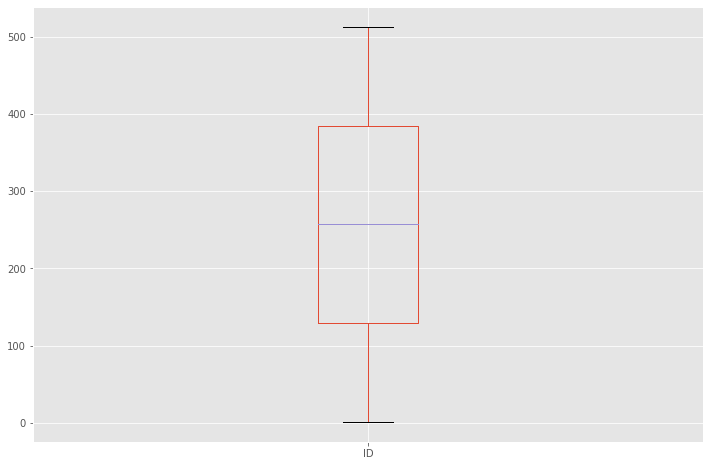

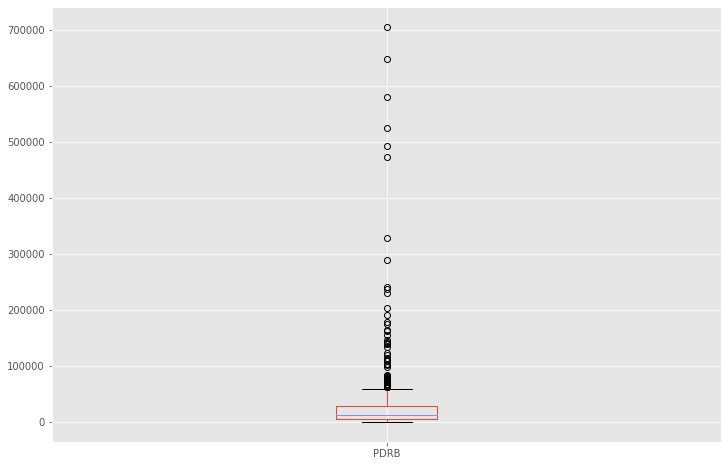

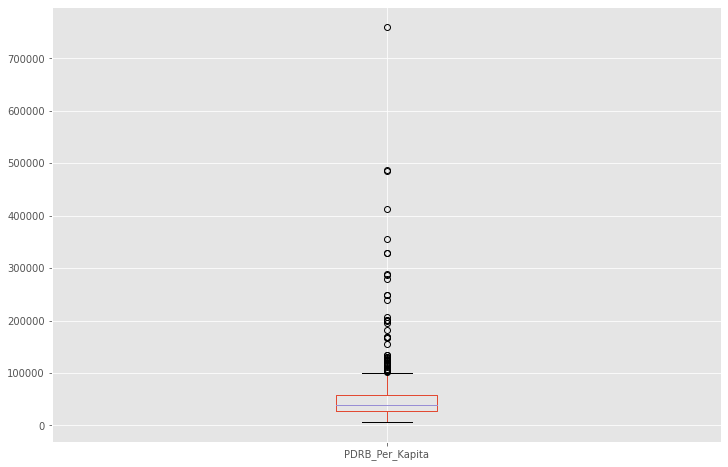

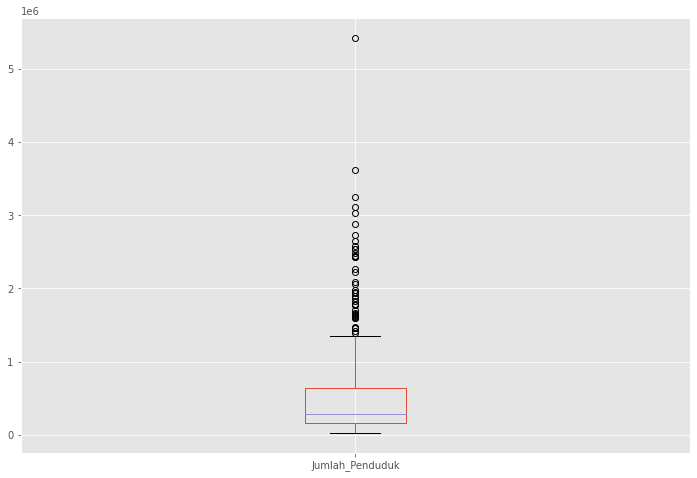

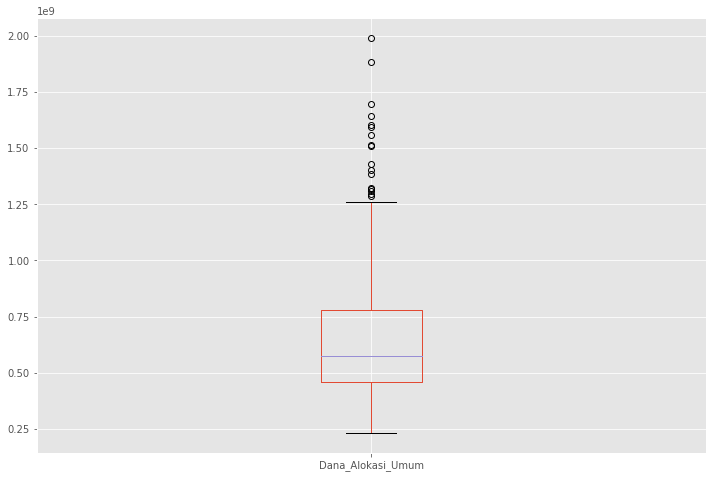

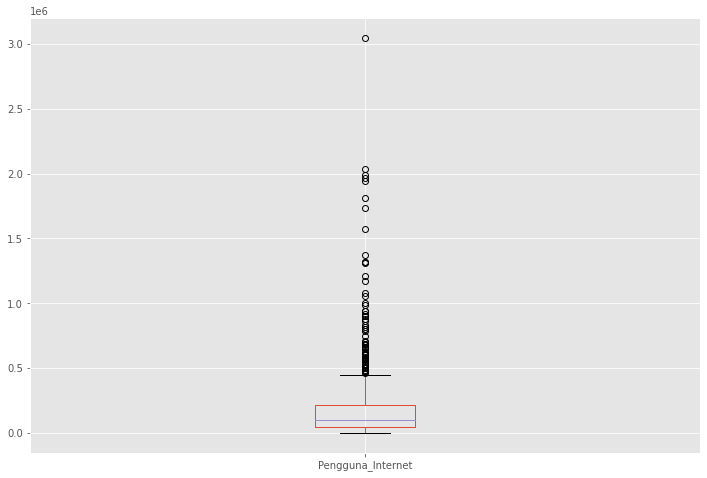

In [58]:
for column in dfint:
    plt.figure()
    dfint.boxplot([column])

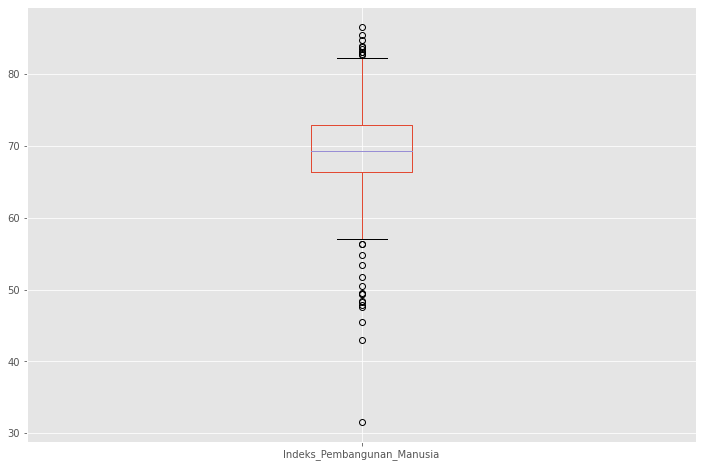

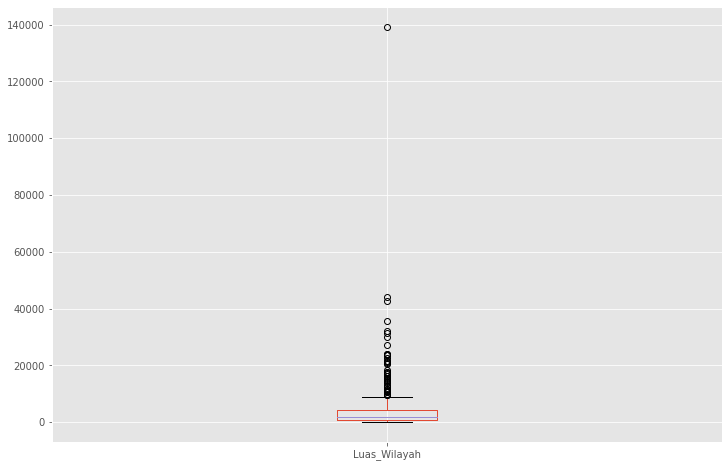

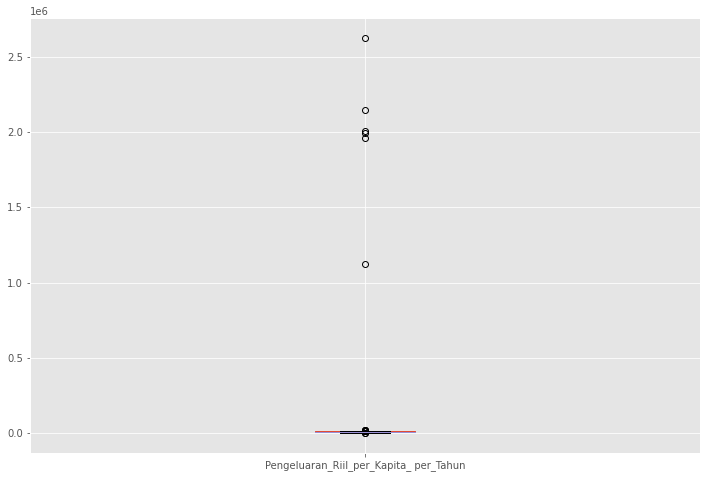

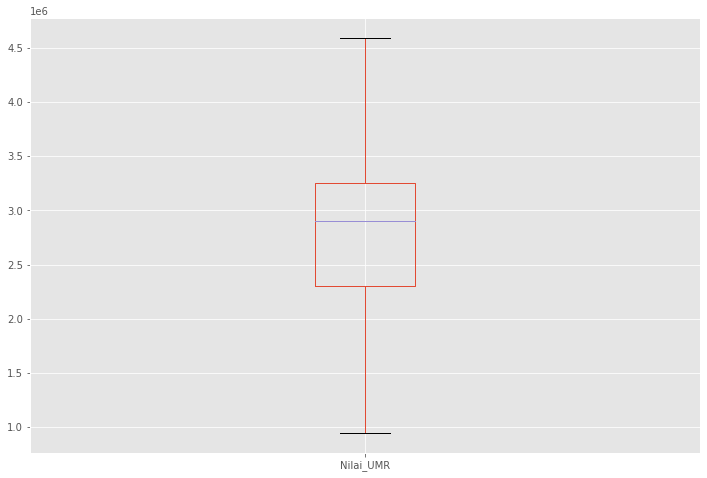

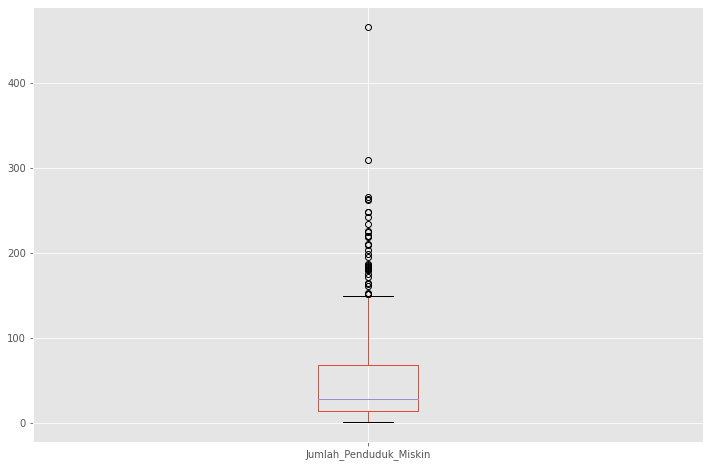

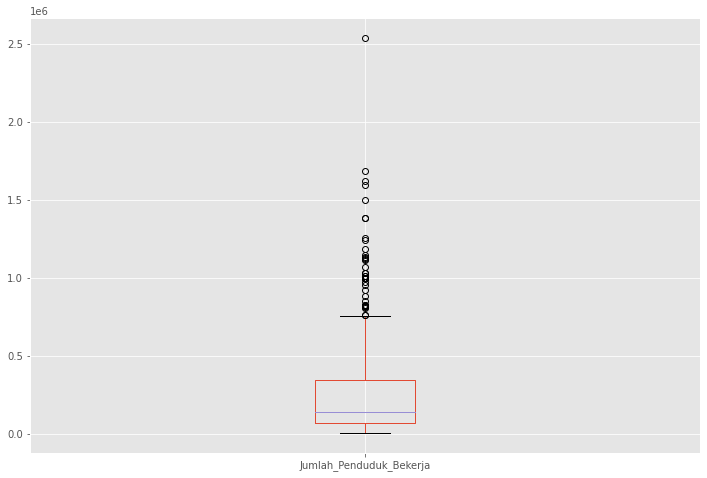

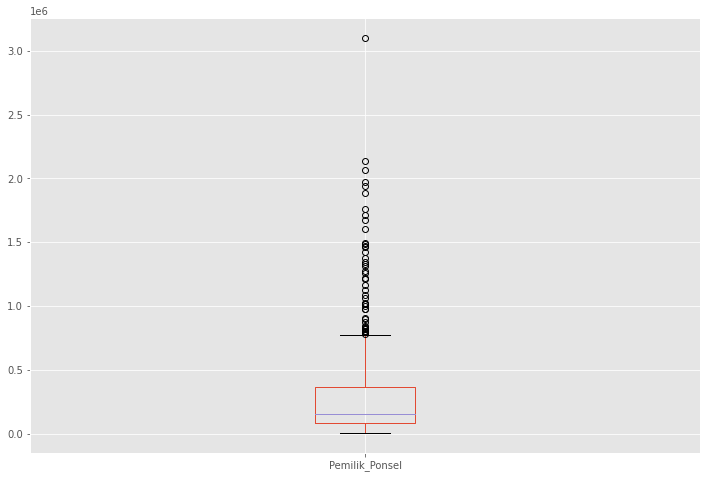

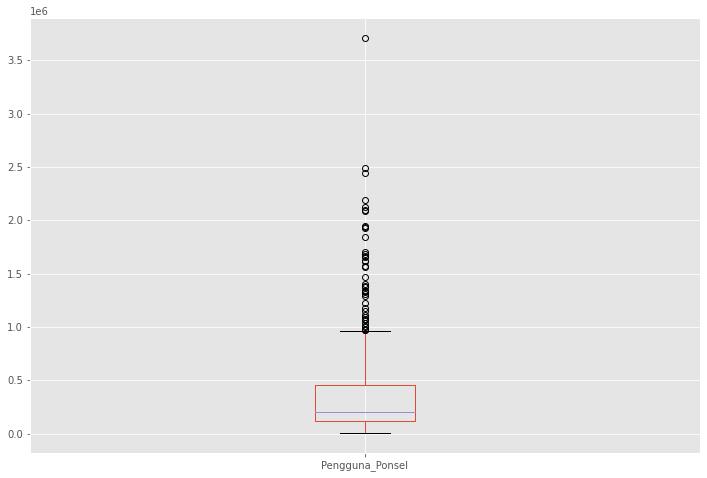

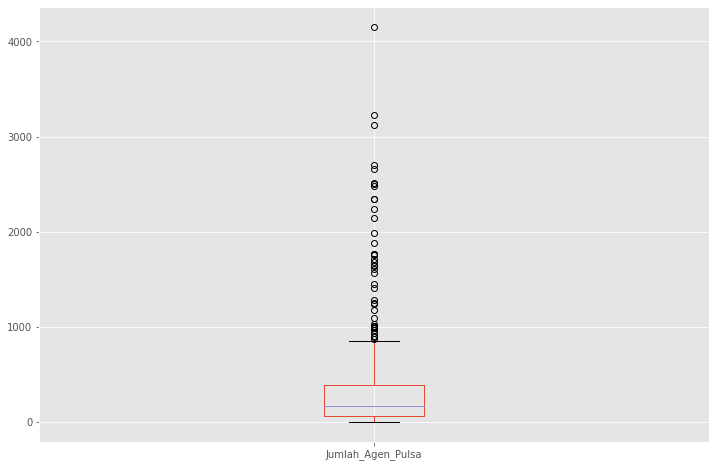

In [59]:
for column in dffloat:
    plt.figure()
    dffloat.boxplot([column])

LOG FEATURES

In [60]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics


 mu = 31513.65 and sigma = 70965.15



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'PDRB')

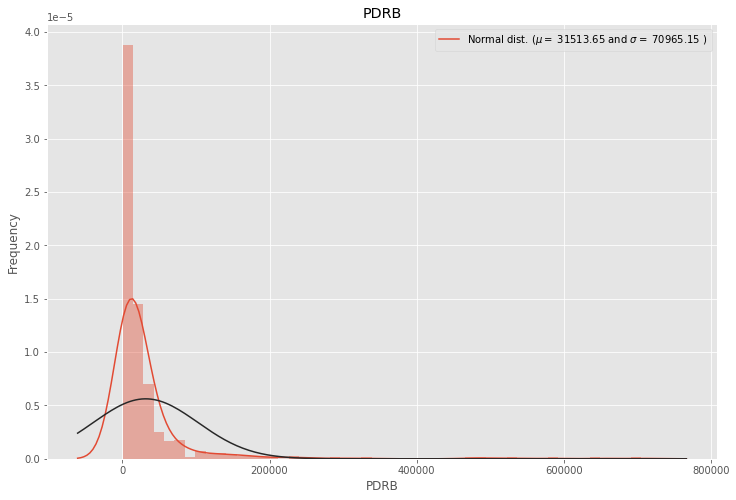

In [61]:
sns.distplot(df['PDRB'] , fit=norm);


(mu, sigma) = norm.fit(df['PDRB'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('PDRB')


In [62]:
df['LOG_PDRB'] = np.log1p(df['PDRB'])

In [63]:
df['LOG_PDRB']

0       8.921191
1      11.183782
2       9.266626
3       8.371474
4       9.222664
         ...    
508     7.528332
509     9.646141
510     8.051022
511     8.950403
512     9.774745
Name: LOG_PDRB, Length: 513, dtype: float64


 mu = 9.46 and sigma = 1.26



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'LOG PDRB')

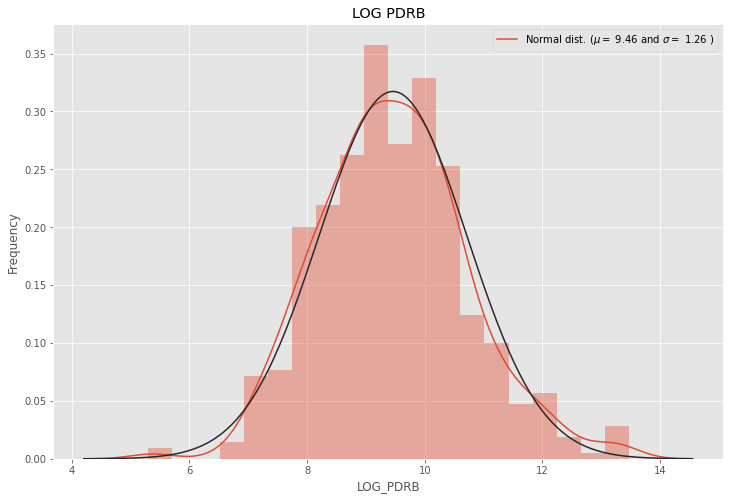

In [64]:
sns.distplot(df['LOG_PDRB'] , fit=norm);


(mu, sigma) = norm.fit(df['LOG_PDRB'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('LOG PDRB')


In [65]:
df['log_PDRB'] = np.log1p(df['PDRB']) 
df['log_PDRB_Per_Kapita'] = np.log1p(df['PDRB_Per_Kapita'])
df['log_Indeks_Pembangunan_Manusia'] = np.log1p(df['Indeks_Pembangunan_Manusia'])
df['log_Dana_Alokasi_Umum'] = np.log1p(df['Dana_Alokasi_Umum'])
df['log_Pengeluaran_Riil_per_Kapita_ per_Tahun'] = np.log1p(df['Pengeluaran_Riil_per_Kapita_ per_Tahun'])
df['log_Nilai_UMR'] = np.log1p(df['Nilai_UMR'])
df['log_Jumlah_Penduduk_Miskin'] = np.log1p(df['Jumlah_Penduduk_Miskin'])
df['log_Jumlah_Penduduk_Bekerja'] = np.log1p(df['Jumlah_Penduduk_Bekerja'])
df['log_Pengguna_Internet'] = np.log1p(df['Pengguna_Internet'])
df['log_Pemilik_Ponsel'] = np.log1p(df['Pemilik_Ponsel'])
df['log_Pengguna_Ponsel'] = np.log1p(df['Pengguna_Ponsel'])
df['log_Jumlah_Penduduk'] = np.log1p(df['Jumlah_Penduduk'])  

In [66]:
df.Area.unique()

array(['Area 1', 'Area 2', 'Area 3', 'Area 4', 'Area 5'], dtype=object)

In [67]:
df.Regional.unique()

array(['Sumbagsel', 'Lampung', 'Sumbagut', 'Sumbagteng', 'Jabar',
       'Jabo Inner', 'Jabo Outer', 'Jatim', 'Jateng', 'Sulawesi',
       'Kalimantan', 'Malpua', 'Balnus'], dtype=object)

In [68]:
df["Area_encode"] =df.Area.map({'Area 1':1, 'Area 2':2, 'Area 3':3, 'Area 4':4, 'Area 5':5})

In [69]:
df["Regional_Encode"] =df.Regional.map({'Sumbagsel':1, 'Lampung':2, 'Sumbagut':3, 'Area 4':4, 'Sumbagteng':5, 'Jabar':6, 'Jabo Inner':7, 'Jabo Outer':8, 'Jatim':9, 'Jateng': 10, 'Sulawesi':11, 'Kalimantan':12, 'Malpua':13, 'Balnus':14})

In [70]:
df.Regional_Encode.unique()

array([ 1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [71]:
df.to_csv('2020cleanedlog.csv')

In [72]:
df

,ID,Kota_Kabupaten,Provinsi,Area,Regional,Jumlah_Kelurahan_Desa,PDRB,PDRB_Per_Kapita,Indeks_Pembangunan_Manusia,Jumlah_Penduduk,...,log_Pengeluaran_Riil_per_Kapita_ per_Tahun,log_Nilai_UMR,log_Jumlah_Penduduk_Miskin,log_Jumlah_Penduduk_Bekerja,log_Pengguna_Internet,log_Pemilik_Ponsel,log_Pengguna_Ponsel,log_Jumlah_Penduduk,Area_encode,Regional_Encode
0,1,Kota Sungai Penuh,Jambi,Area 1,Sumbagsel,4/65,7488,82367,75.42,96357,...,9.234935,14.890513,1.329724,10.640819,10.755645,10.992184,11.189768,11.475826,1,1
1,2,Kab. Lampung Tengah,Lampung,Area 1,Lampung,10/301,71953,56156,70.16,1461172,...,9.325453,14.708497,5.032266,13.403836,13.757450,13.539851,13.924910,14.194750,1,2
2,3,Kab. Mesuji,Lampung,Area 1,Lampung,0/105,10578,52835,63.63,227265,...,8.985320,14.766749,2.754934,11.467217,11.791254,11.652566,12.074682,12.333876,1,2
3,4,Kab. Kepahiang,Bengkulu,Area 1,Sumbagsel,12/105,4321,31498,68.17,149484,...,9.134970,14.610763,3.057298,13.817669,10.912649,11.301982,11.481497,11.914951,1,1
4,5,Kab. Kerinci,Jambi,Area 1,Sumbagsel,2/285,10123,42413,71.21,250006,...,9.209940,14.890513,2.916689,11.679126,10.262560,11.987388,12.140248,12.429244,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,509,Kab. Lembata,Nusa Tenggara Timur,Area 5,Balnus,7/144,1859,12993,64.74,135677,...,8.896451,14.483340,3.661508,11.562962,10.511785,11.021298,11.453048,11.818040,5,14
509,510,Kab. Lombok Barat,Nusa Tenggara Barat,Area 5,Balnus,3/119,15461,22247,68.20,720454,...,9.333000,14.596864,4.617593,12.744120,12.567659,12.764336,13.173895,13.487638,5,14
510,511,Kab. Rote Ndao,Nusa Tenggara Timur,Area 5,Balnus,7/112,3136,18224,62.39,143511,...,8.785692,14.483340,3.907412,11.768854,10.700139,11.032338,11.476500,11.874174,5,14
511,512,Kab. Kupang,Nusa Tenggara Timur,Area 5,Balnus,17/160,7710,19105,64.32,366617,...,8.926252,14.483340,4.563723,12.532545,11.545935,11.938794,12.435361,12.812076,5,14


In [73]:
dffloat=df.select_dtypes(include='float64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


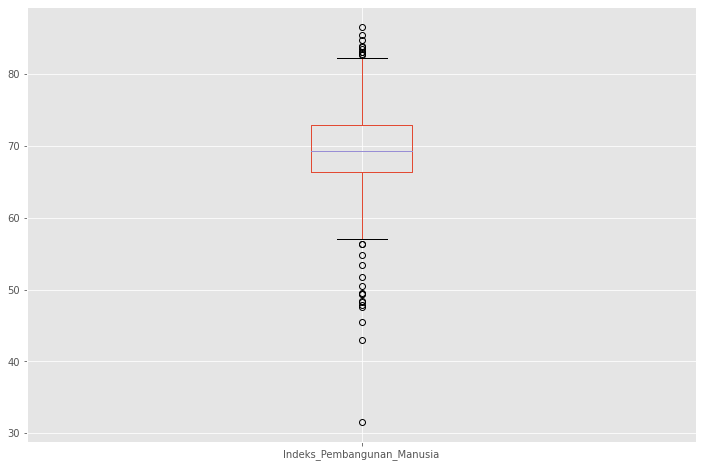

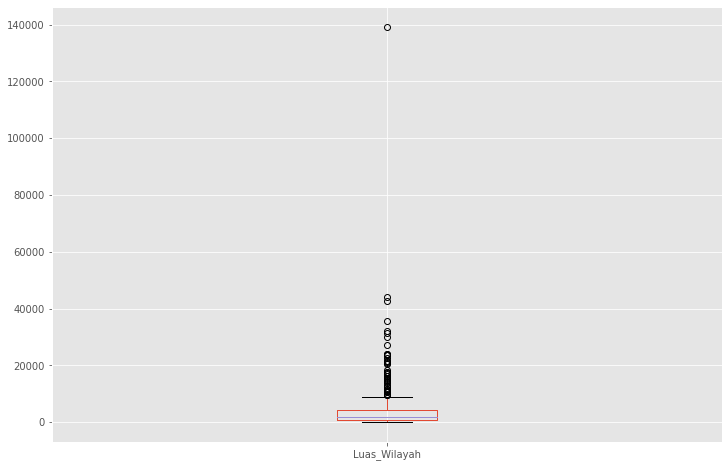

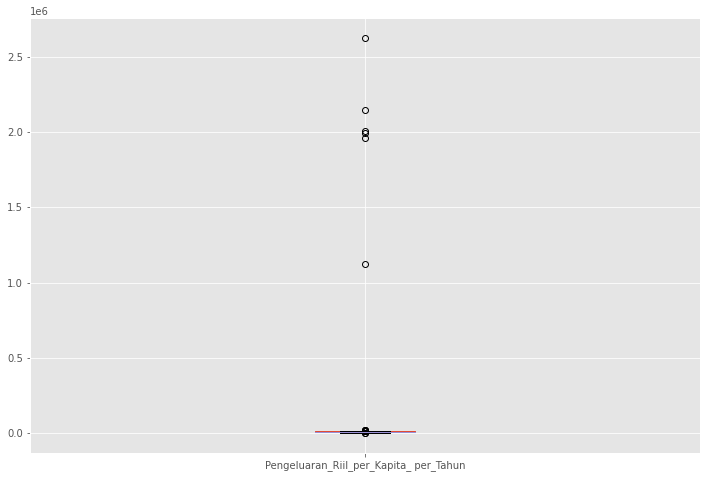

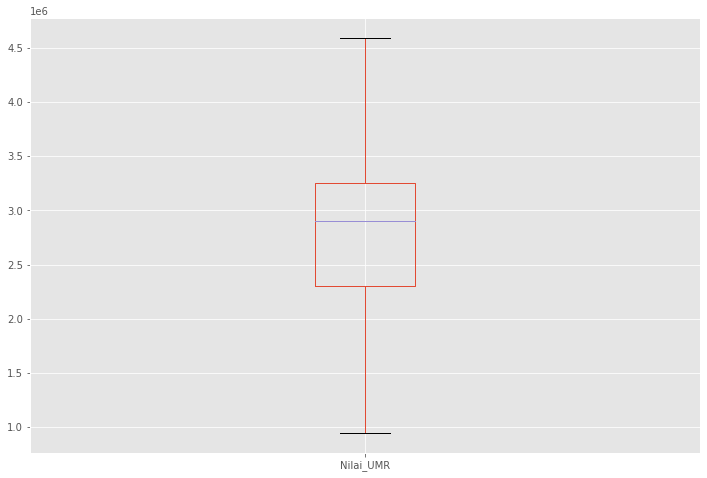

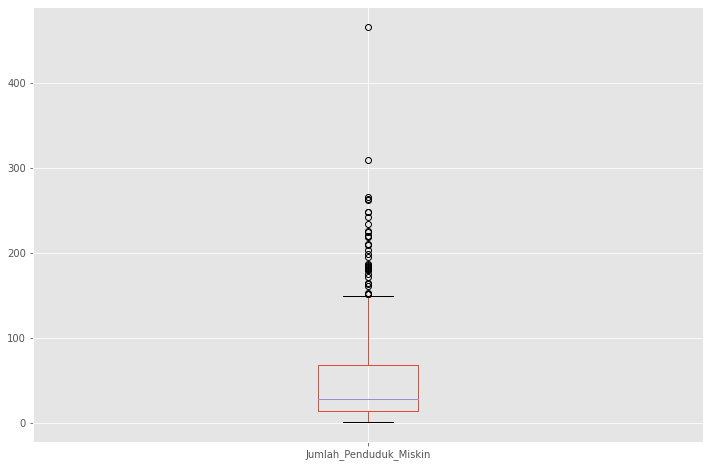

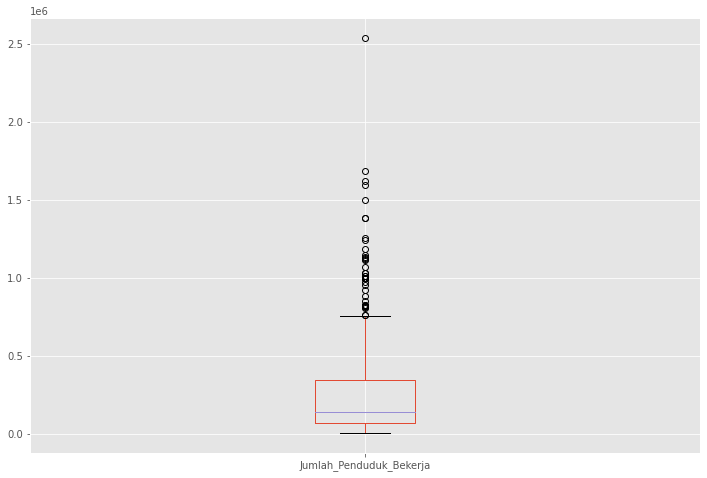

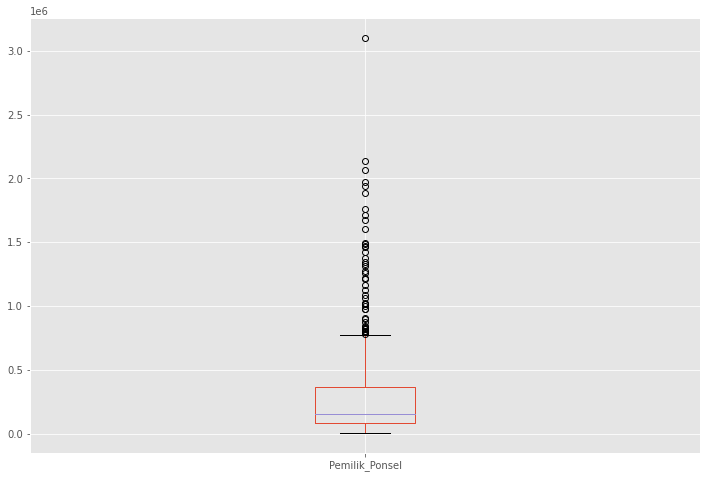

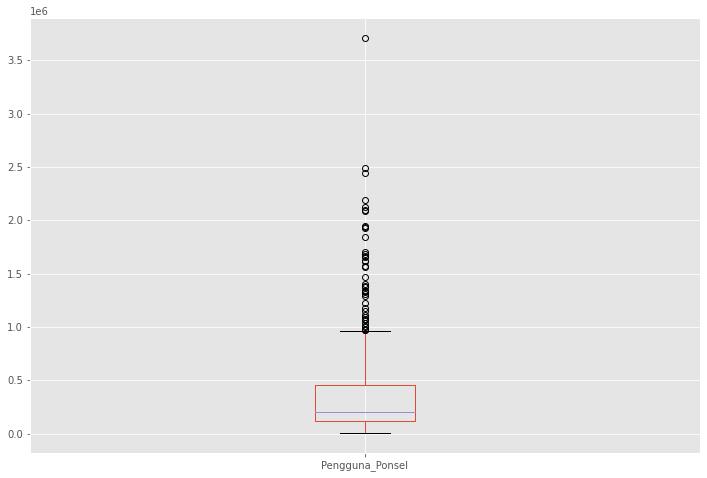

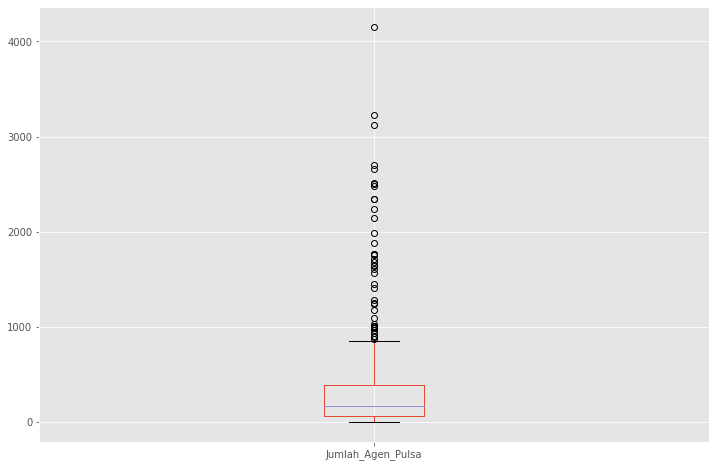

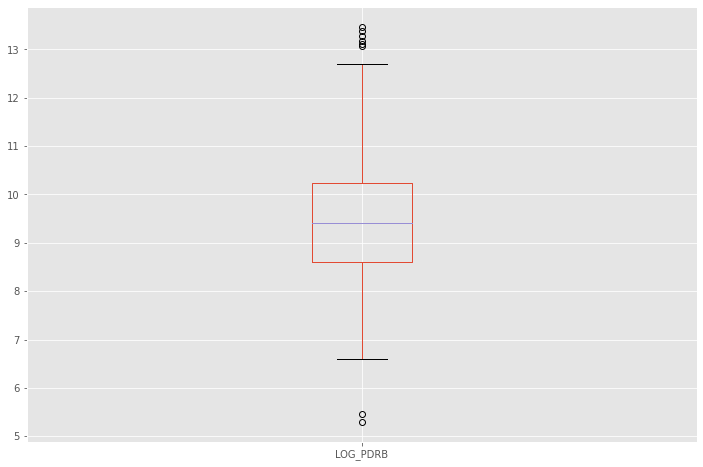

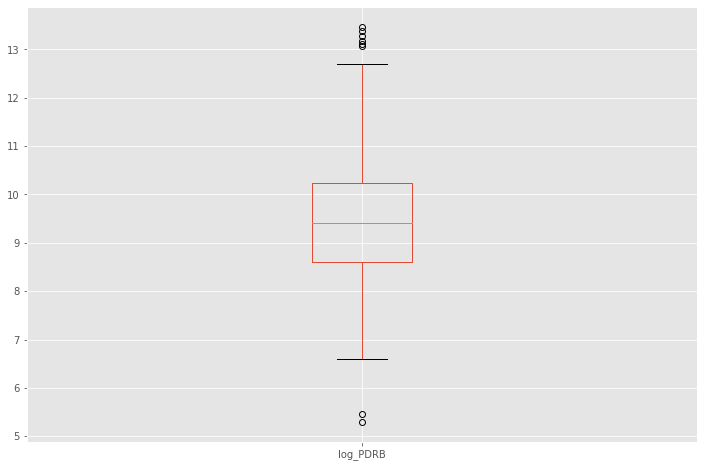

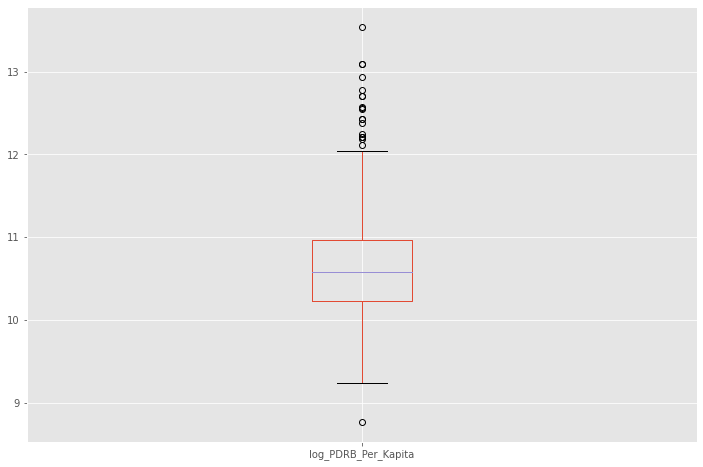

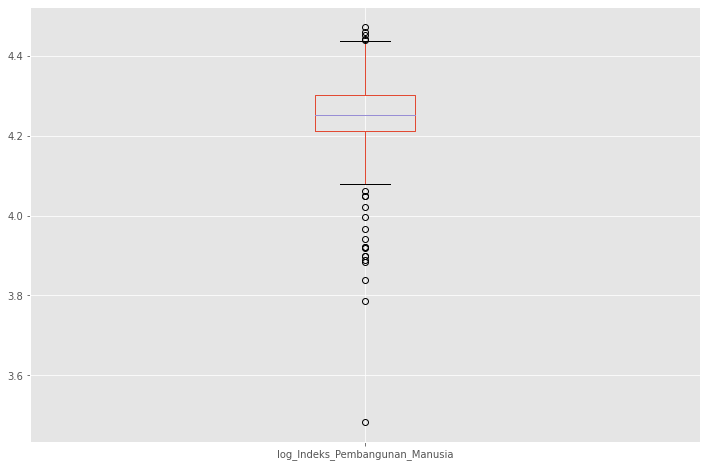

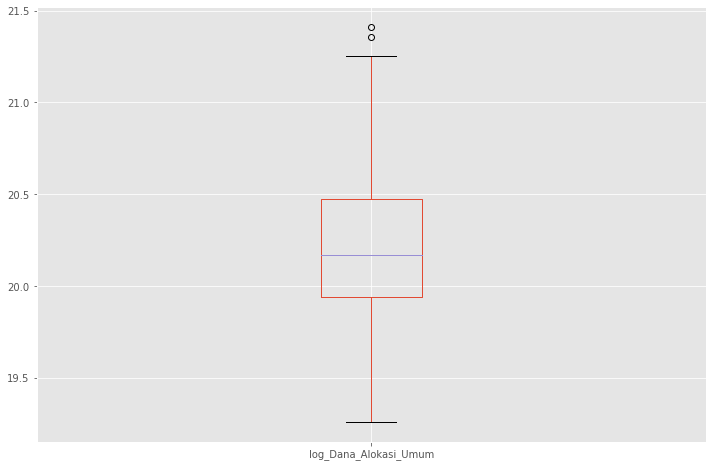

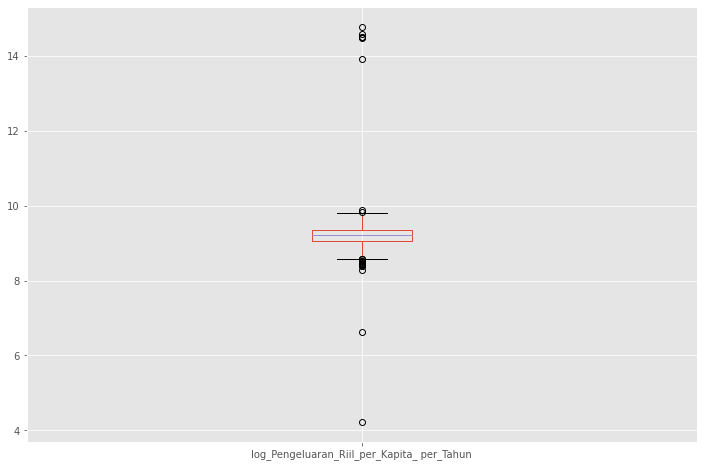

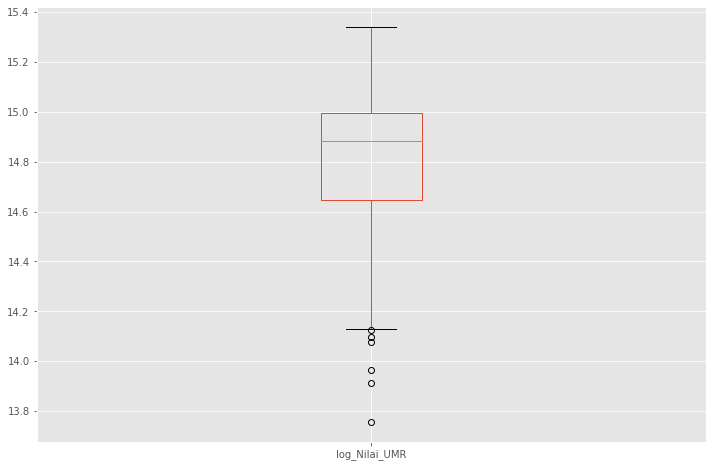

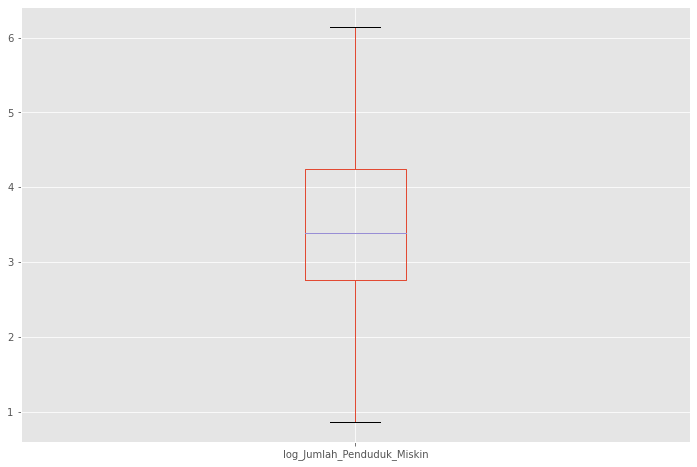

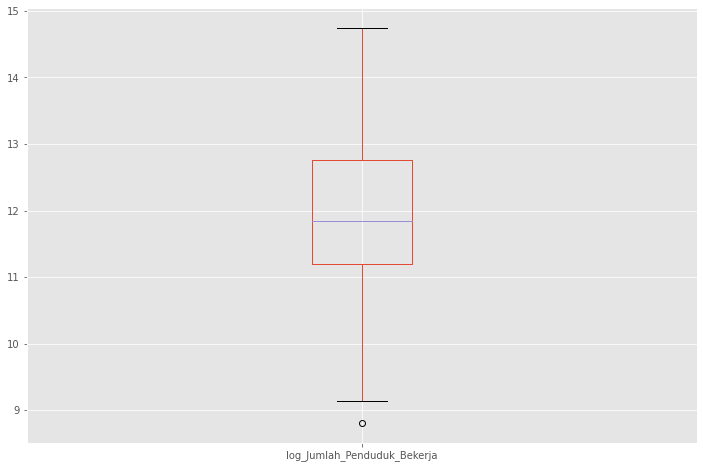

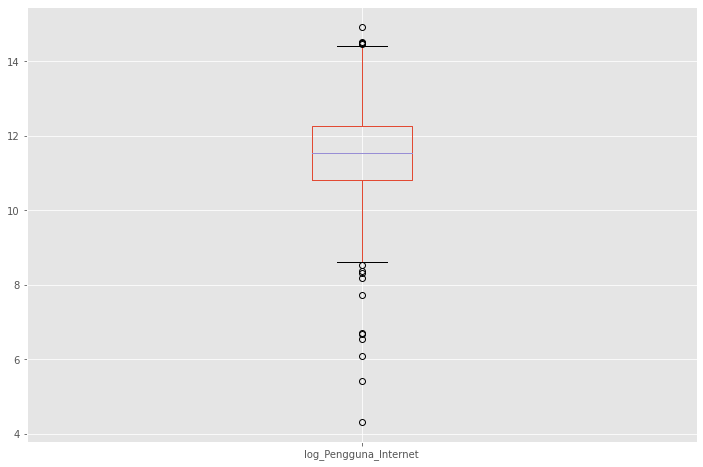

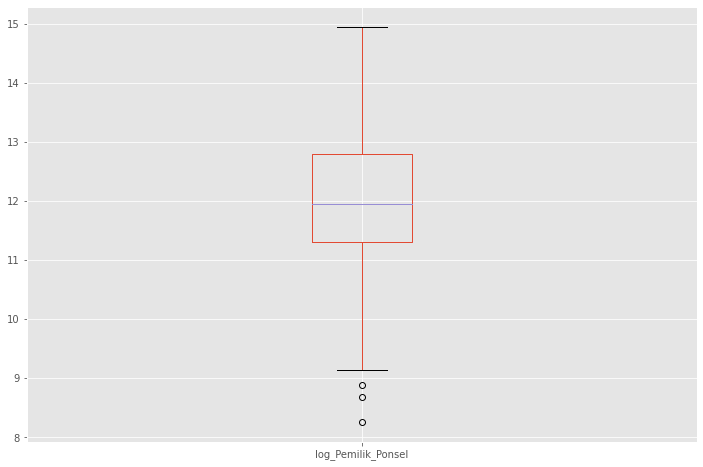

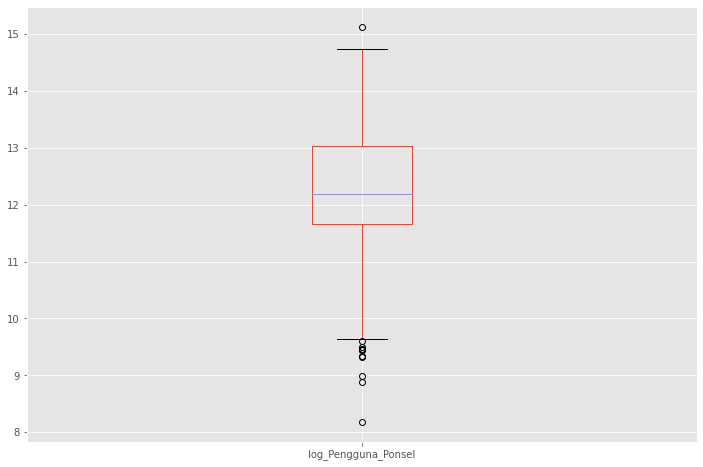

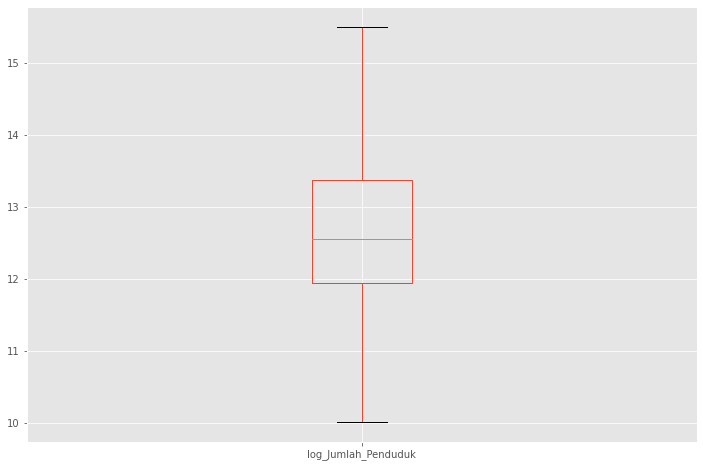

In [74]:
for column in dffloat:
    plt.figure()
    dffloat.boxplot([column])

DUPLICATE

In [75]:
key = ['PDRB', 'PDRB_Per_Kapita', 'Indeks_Pembangunan_Manusia', 'Jumlah_Penduduk', 'Dana_Alokasi_Umum', 'Pengeluaran_Riil_per_Kapita_ per_Tahun', 'Nilai_UMR', 'Jumlah_Penduduk_Miskin', 'Jumlah_Penduduk_Bekerja', 'Pengguna_Internet', 'Pemilik_Ponsel', 'Pengguna_Ponsel', 'Jumlah_Agen_Pulsa']
df_dedupped2 = df.drop_duplicates(subset=key)

print(df.shape)
print(df_dedupped2.shape)

(513, 35)
(513, 35)


In [76]:
df = df.drop_duplicates(subset=key)

In [77]:
df[['Kelurahan', 'Desa']] = df['Jumlah_Kelurahan_Desa'].str.split('/', expand=True)

In [78]:
df.head()

,ID,Kota_Kabupaten,Provinsi,Area,Regional,Jumlah_Kelurahan_Desa,PDRB,PDRB_Per_Kapita,Indeks_Pembangunan_Manusia,Jumlah_Penduduk,...,log_Jumlah_Penduduk_Miskin,log_Jumlah_Penduduk_Bekerja,log_Pengguna_Internet,log_Pemilik_Ponsel,log_Pengguna_Ponsel,log_Jumlah_Penduduk,Area_encode,Regional_Encode,Kelurahan,Desa
0,1,Kota Sungai Penuh,Jambi,Area 1,Sumbagsel,4/65,7488,82367,75.42,96357,...,1.329724,10.640819,10.755645,10.992184,11.189768,11.475826,1,1,4,65
1,2,Kab. Lampung Tengah,Lampung,Area 1,Lampung,10/301,71953,56156,70.16,1461172,...,5.032266,13.403836,13.757450,13.539851,13.924910,14.194750,1,2,10,301
2,3,Kab. Mesuji,Lampung,Area 1,Lampung,0/105,10578,52835,63.63,227265,...,2.754934,11.467217,11.791254,11.652566,12.074682,12.333876,1,2,0,105
3,4,Kab. Kepahiang,Bengkulu,Area 1,Sumbagsel,12/105,4321,31498,68.17,149484,...,3.057298,13.817669,10.912649,11.301982,11.481497,11.914951,1,1,12,105
4,5,Kab. Kerinci,Jambi,Area 1,Sumbagsel,2/285,10123,42413,71.21,250006,...,2.916689,11.679126,10.262560,11.987388,12.140248,12.429244,1,1,2,285


Berapa jumlah Total Kelurahan dan Desa dalam suatu Kota/Kabupaten? (Anda perlu melakukan data cleansing dulu)

In [79]:
df.Kelurahan.unique()

array(['4', '10', '0', '12', '2', '15', '126', '34', '101', '17', '151',
       '31', '-', '3', '6', '20', '47', '62', '27', '37', '16', '107',
       '29', '22', '5', '36', '1', '72', '11', '67', '13', '90', '25',
       '24', '8', '54', '35', '7', '14', '33', '71', '104', '23', '56',
       '83', '53', '9', '42', '18', '64', '19', '39', '89', '44', '69',
       '65', '21', '66', '68', '63', '43', '28', '154', '177', '26', '57',
       '30', '88', '46', '51', '45', '38', '010', '40', '93', '153', '87',
       '77', '70', '07', '96', '48', '50', '95', '52', '59', '86'],
      dtype=object)

In [80]:
#cleasing, mengganti '-' dengan nan
df['Kelurahan'] = df.Kelurahan.replace("-", np.nan)

In [81]:
df[df.isnull().any(axis=1)]

,ID,Kota_Kabupaten,Provinsi,Area,Regional,Jumlah_Kelurahan_Desa,PDRB,PDRB_Per_Kapita,Indeks_Pembangunan_Manusia,Jumlah_Penduduk,...,log_Jumlah_Penduduk_Miskin,log_Jumlah_Penduduk_Bekerja,log_Pengguna_Internet,log_Pemilik_Ponsel,log_Pengguna_Ponsel,log_Jumlah_Penduduk,Area_encode,Regional_Encode,Kelurahan,Desa
9,10,Kota Gunungsitoli,Sumatera Utara,Area 1,Sumbagut,101,5514,38714,69.31,135764,...,3.200304,11.063759,10.743977,11.116202,11.479255,11.818681,1,3,101,None
13,14,Kab. Nias,Sumatera Utara,Area 1,Sumbagut,-/170,3825,27562,61.93,146419,...,3.183041,11.224483,10.267679,10.851723,11.312998,11.894234,1,3,NaN,170
20,21,Kab. Nias Barat,Sumatera Utara,Area 1,Sumbagut,-/105,1817,20955,61.51,89741,...,3.149740,10.232288,9.668904,10.353990,10.754664,11.404694,1,3,NaN,105
30,31,Kota Sabang,Aceh,Area 1,Sumbagut,-/18,1533,43948,75.78,40944,...,1.835776,9.745195,9.364777,9.364777,9.459386,10.619985,1,3,NaN,18
50,51,Kab. Pesisir Selatan,Sumatera Barat,Area 1,Sumbagteng,-/182,14045,30274,69.90,504652,...,3.596216,12.311626,12.021513,12.427070,12.816933,13.131626,1,5,NaN,182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,479,Kab. Tabanan,Bali,Area 5,Balnus,-/133,23886,53590,76.17,461864,...,3.001217,12.489129,12.589514,12.589514,12.722065,13.043028,5,14,NaN,133
488,489,Kab. Bima,Nusa Tenggara Barat,Area 5,Balnus,-/191,11645,23834,66.30,514339,...,4.281101,12.422989,11.909209,12.424581,12.885395,13.150640,5,14,NaN,191
494,495,Kab. Sumba Tengah,Nusa Tenggara Timur,Area 5,Balnus,-/65,1177,16168,61.53,85229,...,3.272227,10.807645,9.567385,10.029591,10.637129,11.353109,5,14,NaN,65
496,497,Kab. Malaka,Nusa Tenggara Timur,Area 5,Balnus,-/127,2778,14475,60.21,183645,...,3.469479,11.806781,10.641393,11.277418,11.802778,12.120765,5,14,NaN,127


In [82]:
df.Kelurahan.unique()

array(['4', '10', '0', '12', '2', '15', '126', '34', '101', '17', '151',
       '31', nan, '3', '6', '20', '47', '62', '27', '37', '16', '107',
       '29', '22', '5', '36', '1', '72', '11', '67', '13', '90', '25',
       '24', '8', '54', '35', '7', '14', '33', '71', '104', '23', '56',
       '83', '53', '9', '42', '18', '64', '19', '39', '89', '44', '69',
       '65', '21', '66', '68', '63', '43', '28', '154', '177', '26', '57',
       '30', '88', '46', '51', '45', '38', '010', '40', '93', '153', '87',
       '77', '70', '07', '96', '48', '50', '95', '52', '59', '86'],
      dtype=object)

In [83]:
df.Desa.unique()

array(['65', '301', '105', '285', '232', '-', '122', '116', None, '170',
       '457', '36', '128', '182', '256', '093', '386', '192', '237',
       '147', '177', '114', '205', '18', '42', '380', '142', '0', '131',
       '126', '212', '112', '221', '73', '299', '240', '93', '144', '264',
       '231', '215', '12', '303', '52', '107', '245', '148', '052', '161',
       '252', '37', '103', '143', '241', '75', '288', '82', '110', '305',
       '74', '227', '79', '153', '55', '159', '138', '141', '150', '186',
       '66', '385', '259', '43', '314', '149', '322', '730', '61', '39',
       '222', '260', '218', '075', '19', '152', '213', '172', '360', '90',
       '96', '604', '609', '136', '070', '295', '513', '62', '197', '50',
       '852', '60', '56', '178', '139', '68', '242', '104', '361', '354',
       '330', '381', '270', '351', '421', '326', '258', '340', '297',
       '412', '165', '16', '416', '183', '246', '309', '180', '341',
       '269', '123', '378', '189', '419', '226', '31

In [84]:
#cleasing, mengganti '-' dengan nan
df['Desa'] = df.Desa.replace("-", np.nan)

In [85]:
df.Desa.unique()

array(['65', '301', '105', '285', '232', nan, '122', '116', None, '170',
       '457', '36', '128', '182', '256', '093', '386', '192', '237',
       '147', '177', '114', '205', '18', '42', '380', '142', '0', '131',
       '126', '212', '112', '221', '73', '299', '240', '93', '144', '264',
       '231', '215', '12', '303', '52', '107', '245', '148', '052', '161',
       '252', '37', '103', '143', '241', '75', '288', '82', '110', '305',
       '74', '227', '79', '153', '55', '159', '138', '141', '150', '186',
       '66', '385', '259', '43', '314', '149', '322', '730', '61', '39',
       '222', '260', '218', '075', '19', '152', '213', '172', '360', '90',
       '96', '604', '609', '136', '070', '295', '513', '62', '197', '50',
       '852', '60', '56', '178', '139', '68', '242', '104', '361', '354',
       '330', '381', '270', '351', '421', '326', '258', '340', '297',
       '412', '165', '16', '416', '183', '246', '309', '180', '341',
       '269', '123', '378', '189', '419', '226', '31

In [86]:
#mengganti none dengan nan
df.Desa.fillna(value=np.nan, inplace=True)

In [87]:
df.Desa.unique()

array(['65', '301', '105', '285', '232', nan, '122', '116', '170', '457',
       '36', '128', '182', '256', '093', '386', '192', '237', '147',
       '177', '114', '205', '18', '42', '380', '142', '0', '131', '126',
       '212', '112', '221', '73', '299', '240', '93', '144', '264', '231',
       '215', '12', '303', '52', '107', '245', '148', '052', '161', '252',
       '37', '103', '143', '241', '75', '288', '82', '110', '305', '74',
       '227', '79', '153', '55', '159', '138', '141', '150', '186', '66',
       '385', '259', '43', '314', '149', '322', '730', '61', '39', '222',
       '260', '218', '075', '19', '152', '213', '172', '360', '90', '96',
       '604', '609', '136', '070', '295', '513', '62', '197', '50', '852',
       '60', '56', '178', '139', '68', '242', '104', '361', '354', '330',
       '381', '270', '351', '421', '326', '258', '340', '297', '412',
       '165', '16', '416', '183', '246', '309', '180', '341', '269',
       '123', '378', '189', '419', '226', '311', '2

In [88]:
#mengisi nan dengan nol
df['Kelurahan'] = df['Kelurahan'].fillna(0)

In [89]:
#mengisi nan dengan nol
df['Desa'] = df['Desa'].fillna(0)

In [90]:
#mengganti menjadi numeric agar bisa diolah
df['Kelurahan'] = pd.to_numeric(df['Kelurahan'], errors='coerce')
df['Desa'] = pd.to_numeric(df['Desa'], errors='coerce')

In [91]:
dfkabupatenkota = df.groupby(['Kota_Kabupaten']).sum()

In [92]:
dfkabupatenkota['Kelurahan']

Kota_Kabupaten
Kab. Aceh Barat           0
Kab. Aceh Barat Daya      0
Kab. Aceh Besar           0
Kab. Aceh Jaya            0
Kab. Aceh Selatan         0
                         ..
Kota Ternate             77
Kota Tidore Kepulauan    40
Kota Tomohon             44
Kota Tual                 3
Kota Yogyakarta          45
Name: Kelurahan, Length: 513, dtype: int64

In [93]:
dfkabupatenkota['Desa']

Kota_Kabupaten
Kab. Aceh Barat          322
Kab. Aceh Barat Daya     152
Kab. Aceh Besar          604
Kab. Aceh Jaya           172
Kab. Aceh Selatan        260
                        ... 
Kota Ternate               0
Kota Tidore Kepulauan     49
Kota Tomohon               0
Kota Tual                 27
Kota Yogyakarta            0
Name: Desa, Length: 513, dtype: int64

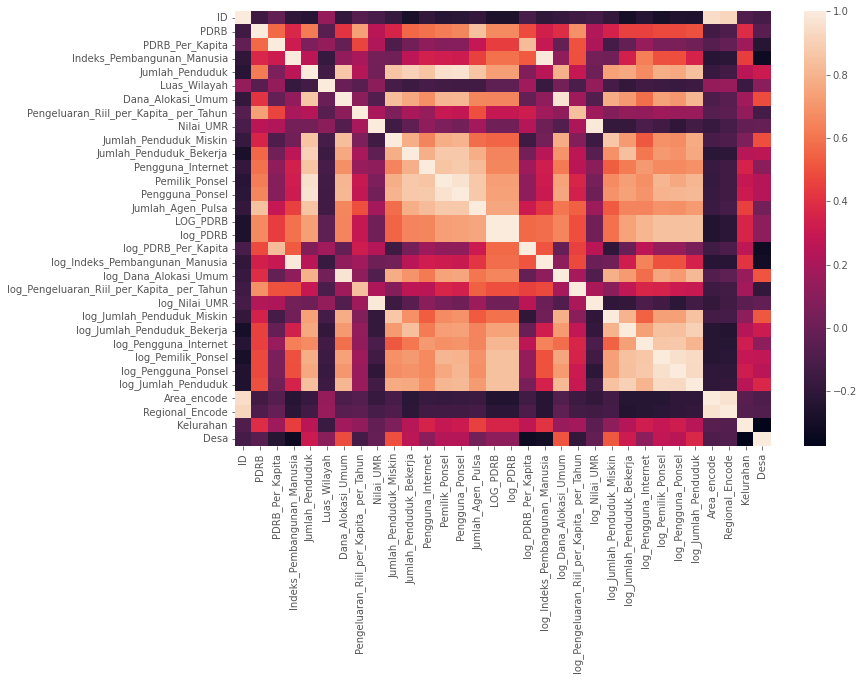

In [94]:
sns.heatmap(df.corr())

# TUGAS 3

Vanilla Linear Regression

In [95]:
df.head()

,ID,Kota_Kabupaten,Provinsi,Area,Regional,Jumlah_Kelurahan_Desa,PDRB,PDRB_Per_Kapita,Indeks_Pembangunan_Manusia,Jumlah_Penduduk,...,log_Jumlah_Penduduk_Miskin,log_Jumlah_Penduduk_Bekerja,log_Pengguna_Internet,log_Pemilik_Ponsel,log_Pengguna_Ponsel,log_Jumlah_Penduduk,Area_encode,Regional_Encode,Kelurahan,Desa
0,1,Kota Sungai Penuh,Jambi,Area 1,Sumbagsel,4/65,7488,82367,75.42,96357,...,1.329724,10.640819,10.755645,10.992184,11.189768,11.475826,1,1,4,65
1,2,Kab. Lampung Tengah,Lampung,Area 1,Lampung,10/301,71953,56156,70.16,1461172,...,5.032266,13.403836,13.757450,13.539851,13.924910,14.194750,1,2,10,301
2,3,Kab. Mesuji,Lampung,Area 1,Lampung,0/105,10578,52835,63.63,227265,...,2.754934,11.467217,11.791254,11.652566,12.074682,12.333876,1,2,0,105
3,4,Kab. Kepahiang,Bengkulu,Area 1,Sumbagsel,12/105,4321,31498,68.17,149484,...,3.057298,13.817669,10.912649,11.301982,11.481497,11.914951,1,1,12,105
4,5,Kab. Kerinci,Jambi,Area 1,Sumbagsel,2/285,10123,42413,71.21,250006,...,2.916689,11.679126,10.262560,11.987388,12.140248,12.429244,1,1,2,285


In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

X = df[['log_PDRB_Per_Kapita', 'log_Indeks_Pembangunan_Manusia', 'log_PDRB', 'log_Jumlah_Penduduk', 'log_Dana_Alokasi_Umum', 'log_Pengeluaran_Riil_per_Kapita_ per_Tahun', 'log_Nilai_UMR', 'log_Jumlah_Penduduk_Miskin', 'log_Jumlah_Penduduk_Bekerja', 'log_Pengguna_Internet', 'log_Pemilik_Ponsel', 'log_Pengguna_Ponsel', 'Area_encode', 'Regional_Encode']]
y = df['Jumlah_Agen_Pulsa']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [97]:
model = LinearRegression()
clf = model.fit(X_train, y_train)

In [98]:
y_pred = clf.predict(X_test)

In [99]:
#ada kemungkinan overfitting sehingga periksa feature importance
clf.score(X_test, y_test)

0.6177439053525804

In [100]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

315.3704470297721

Feature: 0, Score: -301.74144
Feature: 1, Score: -78.02879
Feature: 2, Score: 367.72323
Feature: 3, Score: -151.65594
Feature: 4, Score: 197.68440
Feature: 5, Score: 249.91469
Feature: 6, Score: 283.98961
Feature: 7, Score: -39.89361
Feature: 8, Score: 22.39405
Feature: 9, Score: -16.74154
Feature: 10, Score: -69.36225
Feature: 11, Score: 119.61508
Feature: 12, Score: -52.61002
Feature: 13, Score: 24.41497


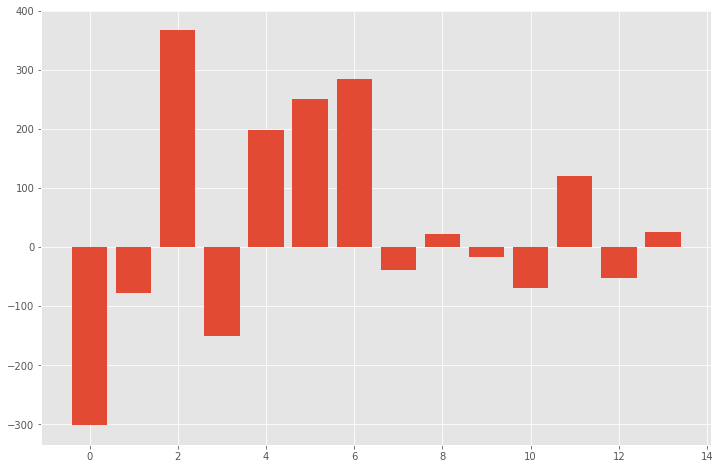

In [101]:
from matplotlib import pyplot
importance = clf.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [102]:
# Perform lasso reggresion in x_train and y to find feature importance
lasso=Lasso(alpha=0.001)
modellasso = lasso.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.573e+04, tolerance: 8.359e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [103]:
y_predlasso = modellasso.predict(X_test)

In [104]:
modellasso.score(X_test, y_test)

0.6177467323319702

In [105]:
FI_lasso = pd.DataFrame({"Feature Importance":lasso.coef_}, index=X_train.columns)

In [106]:
FI_lasso.sort_values("Feature Importance",ascending=False)

,Feature Importance
log_PDRB,367.486407
log_Nilai_UMR,283.966443
log_Pengeluaran_Riil_per_Kapita_ per_Tahun,249.902858
log_Dana_Alokasi_Umum,197.644433
log_Pengguna_Ponsel,119.565647
Regional_Encode,24.409986
log_Jumlah_Penduduk_Bekerja,22.392633
log_Pengguna_Internet,-16.746927
log_Jumlah_Penduduk_Miskin,-39.870284
Area_encode,-52.594337


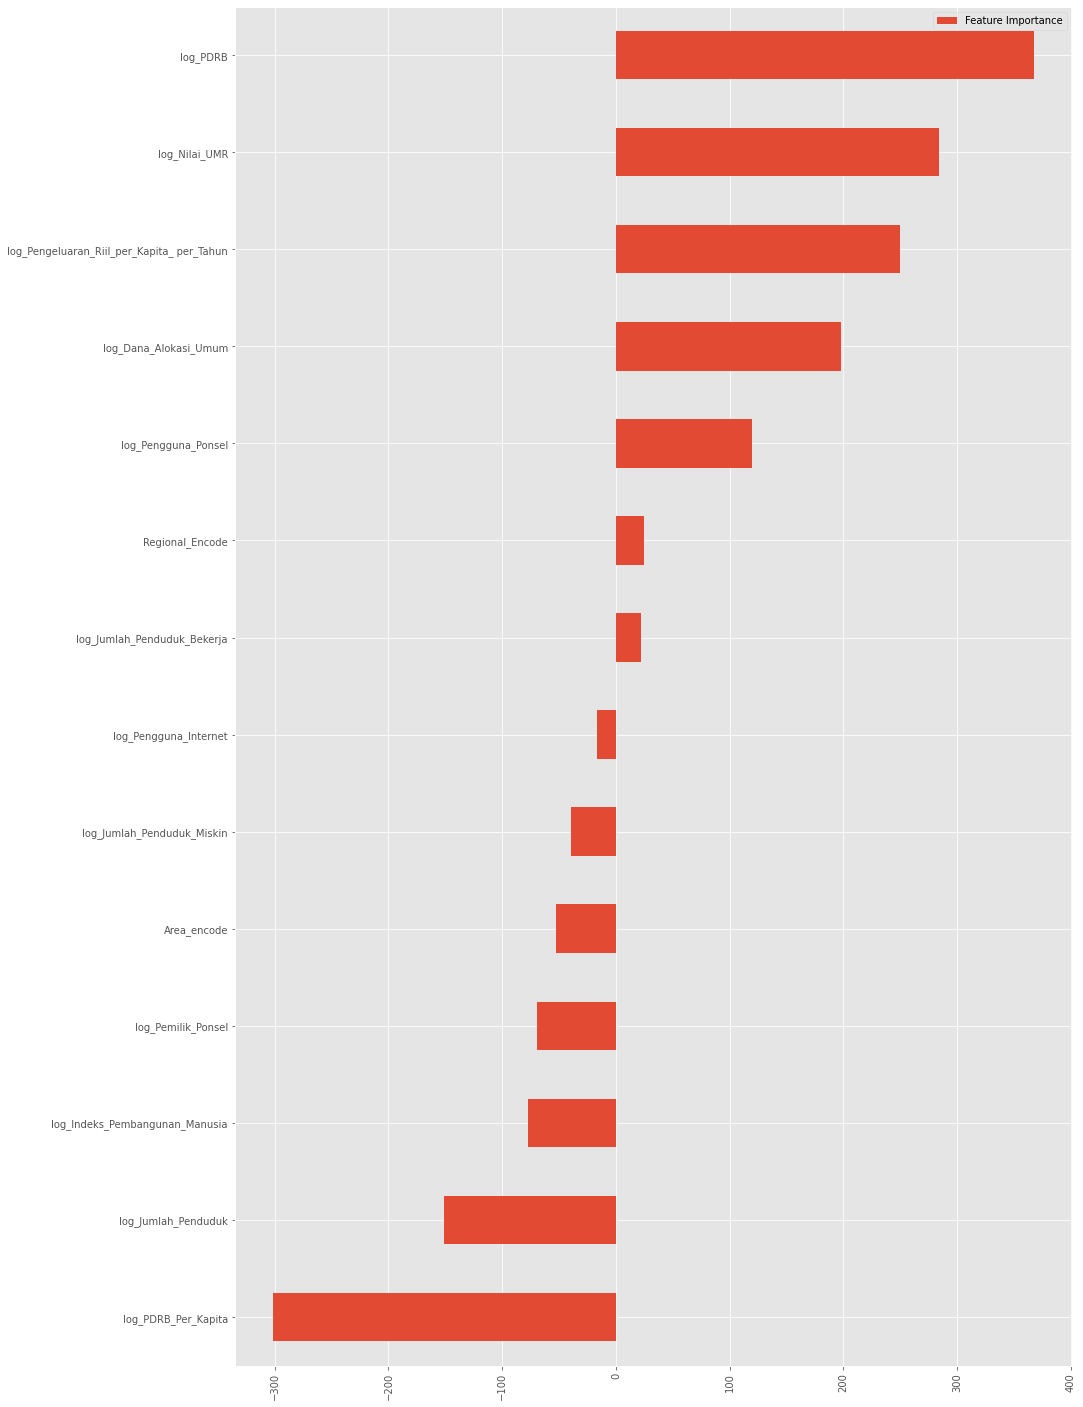

In [107]:
FI_lasso[FI_lasso["Feature Importance"]!=0].sort_values("Feature Importance").plot(kind="barh",figsize=(15,25))
plt.xticks(rotation=90)
plt.show()

# DECISION TREE REGRESSOR

In [108]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import set_config 

In [109]:
set_config(print_changed_only=False) 
 
dtr = DecisionTreeRegressor(random_state = 42)
print(dtr)
 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='squared_error', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      random_state=42, splitter='best')


In [110]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='squared_error', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      random_state=42, splitter='best')

In [111]:
score = dtr.score(X_test, y_test)
print("R-squared:", score) 

R-squared: 0.7425394845059727


In [112]:
from sklearn.metrics import mean_squared_error
from math import sqrt
ypred = dtr.predict(X_test)

In [113]:
mse = mean_squared_error(y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 

MSE:  66988.18382352941
RMSE:  258.8207561682977


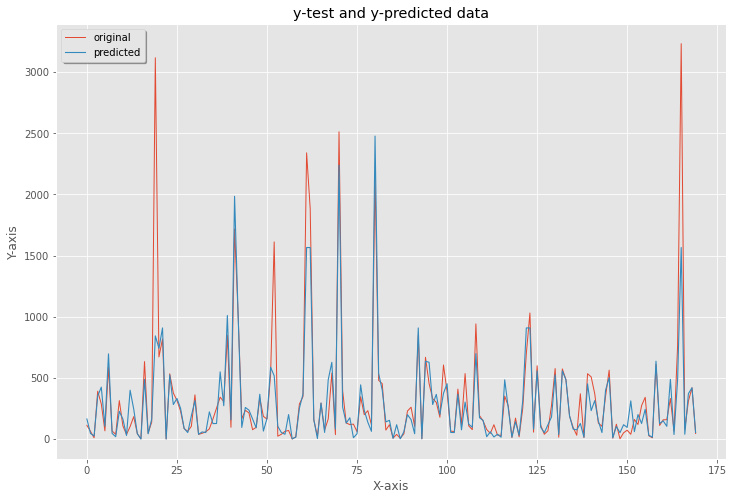

In [114]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, ypred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 


# **FEATURE SELECTION DECISION TREE REGRESSOR**

In [ ]:
pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import joblib

In [ ]:
pip install mlxtend --upgrade --no-deps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 15.6 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [ ]:
sfs1 = sfs(dtr, k_features=(4, 14),
          forward=True, 
          floating=False, 
          scoring='r2',
          cv=cv)

In [ ]:
sfs2 = sfs(dtr, k_features=(4,14),
          forward=False, 
          floating=False, 
          scoring='r2',
          cv=cv)

In [ ]:
sfs1 = sfs1.fit(X_train, y_train)

In [ ]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['log_PDRB', 'log_Dana_Alokasi_Umum', 'log_Pengeluaran_Riil_per_Kapita_ per_Tahun', 'log_Pengguna_Internet', 'log_Pemilik_Ponsel']


In [ ]:
sfs1.k_score_

0.8287897891532517

In [ ]:
print('best combination (ACC: %.3f): %s\n' % (sfs1.k_score_, sfs1.k_feature_idx_))
print('all subsets:\n', sfs1.subsets_)

best combination (ACC: 0.829): (1, 3, 5, 11)

all subsets:
 {1: {'feature_idx': (11,), 'cv_scores': array([ 0.41157502,  0.89305392, -0.49898034,  0.82157495,  0.78355538,
        0.30060275,  0.25075185,  0.68360055,  0.11133539,  0.85203231,
        0.20121542,  0.96224382,  0.95444992,  0.47633219,  0.73267699,
       -0.50504909, -0.41746955,  0.06498391,  0.79525113,  0.51476169,
        0.76389369,  0.8423026 ,  0.13113191,  0.66965848, -0.09307637,
        0.15978716,  0.37008024,  0.72451155,  0.42493863,  0.44461698]), 'avg_score': 0.4275447696545646, 'feature_names': ('log_Pengguna_Ponsel',)}, 2: {'feature_idx': (5, 11), 'cv_scores': array([ 0.61478585,  0.66781157,  0.67744186,  0.9677181 ,  0.96018138,
        0.76911375,  0.844791  ,  0.80729091,  0.91940357,  0.91569819,
        0.84333894,  0.79955786,  0.96417796,  0.65808702,  0.84826522,
       -0.07927376,  0.08323157,  0.927648  ,  0.61221078,  0.87114243,
        0.84078013,  0.92204413,  0.81351105,  0.95035178,  

In [ ]:
print('Selected features:', sfs1.k_feature_idx_)

Selected features: (1, 3, 5, 11)


In [ ]:
# Generate the new subsets based on the selected features
# Note that the transform call is equivalent to
# X_train[:, sfs1.k_feature_idx_]

X_train_sfs = sfs1.transform(X_train)
X_test_sfs = sfs1.transform(X_test)


In [ ]:
# Fit the estimator using the new feature subset
# and make a prediction on the test data
dtr.fit(X_train_sfs, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='squared_error', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      random_state=42, splitter='best')

In [ ]:
y_pred = dtr.predict(X_test_sfs)

In [ ]:
# Compute the accuracy of the prediction
score = dtr.score(X_test_sfs, y_test)
print("R-squared:", score) 

R-squared: 0.7360726718578763


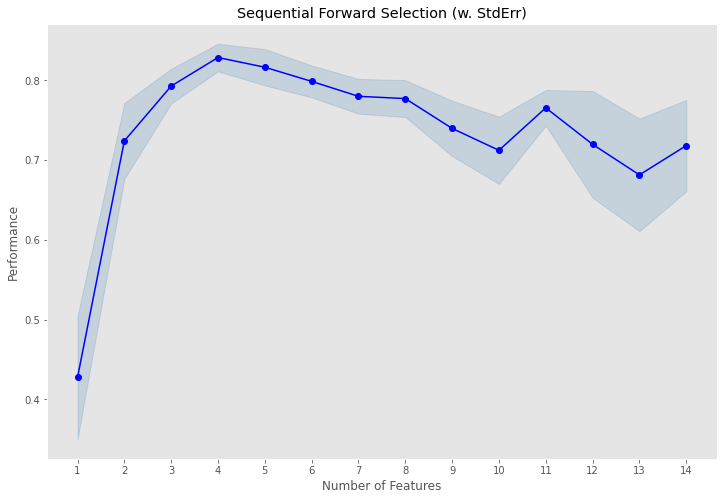

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig = plot_sfs(sfs1.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

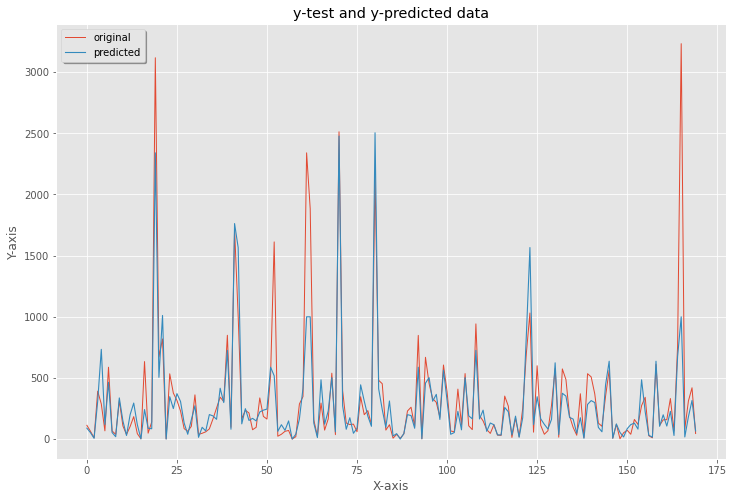

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [ ]:
sfs2 = sfs2.fit(X_train, y_train)

In [ ]:
feat_names = list(sfs2.k_feature_names_)
print(feat_names)

['log_PDRB_Per_Kapita', 'log_PDRB', 'log_Pengeluaran_Riil_per_Kapita_ per_Tahun', 'log_Jumlah_Penduduk_Bekerja', 'log_Pengguna_Ponsel', 'Regional_Encode']


In [ ]:
sfs2.k_score_

0.7929626630185745

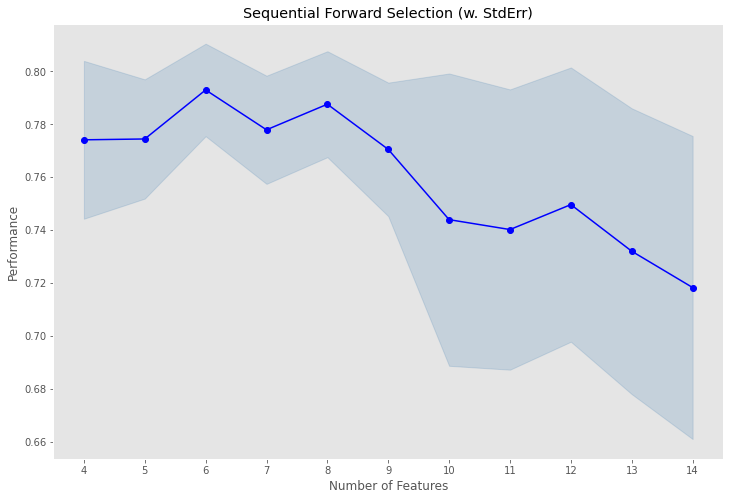

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig = plot_sfs(sfs2.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [ ]:
# Generate the new subsets based on the selected features
# Note that the transform call is equivalent to
# X_train[:, sfs1.k_feature_idx_]

X_train_sfs2 = sfs2.transform(X_train)
X_test_sfs2 = sfs2.transform(X_test)


In [ ]:
# Fit the estimator using the new feature subset
# and make a prediction on the test data
dtr.fit(X_train_sfs2, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='squared_error', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      random_state=42, splitter='best')

In [ ]:
y_pred2 = dtr.predict(X_test_sfs2)

In [ ]:
# Compute the accuracy of the prediction
score = dtr.score(X_test_sfs2, y_test)
print("R-squared:", score) 

R-squared: 0.7354366163864683
